<a href="https://colab.research.google.com/github/jsblandon/ShapeClassification/blob/master/mainReliefFCKA_AnimalsDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bag of Contour Fragments Feature Selection using ReliefF and Centered Kernel Alignment - Animals DB**

**Authors:** 


*   Juan Sebastian Blandon Luengas, Automatic Researh Group, Universidad Tecnologica de Pereira, jsblandon@utp.edu.co
*   Andres Marino Alvarez Meza, Control and Digital Signal Processing Group, Universidad Nacional de Colombia - Sede Manizales, amalvarezme@unal.edu.co



**Recommendation before starting**

Preventing Google Colab disconection:



1.   Press key combination $\texttt{Ctrl+Shift+i}$. Then, in the emerging window press $\texttt{Console}$

2.   Once the $\texttt{Console}$ has open, introduce the next code:


  ```
  function ClickConnect(){
  console.log("Working"); 
  document.querySelector("colab-toolbar-button#connect").click() 
  }
  setInterval(ClickConnect,60000)
  ```



3.   Then, press $\texttt{Enter}$. If the process is correct the message $\texttt{working}$ appears in console, but if it is incorrect introduce the next code:



  ```
  function ClickConnect(){
  console.log("Working"); 
  document.querySelector("colab-toolbar-button").click() 
  }setInterval(ClickConnect,60000)
  ```

**Loading auxiliary functions and database from a .zip file**

We load the needed complementary functions to run this code. Specially, we used a version of Centered Kernel Alignment algorithm implemented in python, which is based on the codes from:

*Alvarez-Meza AM, Orozco-Gutierrez A, Castellanos-Dominguez G. Kernel-based relevance analysis with enhanced interpretability for detection of brain activity patterns. Frontiers in neuroscience. 2017 Oct 6;11:550.*

In [ ]:
# This code cell loads the Auxiliary Functions:
FILEID = "10bDUcXkDixgtZziiYJQGXL1YX6JpjkoS"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-05-25 19:38:48--  https://docs.google.com/uc?export=download&confirm=&id=10bDUcXkDixgtZziiYJQGXL1YX6JpjkoS
Resolving docs.google.com (docs.google.com)... 173.194.218.101, 173.194.218.102, 173.194.218.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.218.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-bk-docs.googleusercontent.com/docs/securesc/c4965gkg8bc30cjd85denn0qc27h0t78/4ks90ehjdt7erqs5nk2ij46n2vmaf2v4/1590435525000/16942134963990678590/17004495406964486433Z/10bDUcXkDixgtZziiYJQGXL1YX6JpjkoS?e=download [following]
--2020-05-25 19:38:48--  https://doc-0s-bk-docs.googleusercontent.com/docs/securesc/c4965gkg8bc30cjd85denn0qc27h0t78/4ks90ehjdt7erqs5nk2ij46n2vmaf2v4/1590435525000/16942134963990678590/17004495406964486433Z/10bDUcXkDixgtZziiYJQGXL1YX6JpjkoS?e=download
Resolving doc-0s-bk-docs.googleusercontent.com (doc-0s-bk-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connectin

The next cell load the database, which is get from the Bag of Contour Fragments approach proposed in:

*Wang X, Feng B, Bai X, Liu W, Latecki LJ. Bag of contour fragments for robust shape classification. Pattern Recognition. 2014 Jun 1;47(6):2116-25.*

In [ ]:
# This code cell load the Database
FILEID = "1rIbmREOH2Kdd18yqs-PnhlZQ9H9Vg_vo"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-05-25 19:39:00--  https://docs.google.com/uc?export=download&confirm=ZvCo&id=1rIbmREOH2Kdd18yqs-PnhlZQ9H9Vg_vo
Resolving docs.google.com (docs.google.com)... 74.125.31.138, 74.125.31.113, 74.125.31.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-08-docs.googleusercontent.com/docs/securesc/bmg55l2tne7lhpu4gt1bv1ebgt12rlo1/e1rbuc9iu79ftds9jealg570maqs2jiq/1590435525000/16942134963990678590/17298038241750570518Z/1rIbmREOH2Kdd18yqs-PnhlZQ9H9Vg_vo?e=download [following]
--2020-05-25 19:39:00--  https://doc-0c-08-docs.googleusercontent.com/docs/securesc/bmg55l2tne7lhpu4gt1bv1ebgt12rlo1/e1rbuc9iu79ftds9jealg570maqs2jiq/1590435525000/16942134963990678590/17298038241750570518Z/1rIbmREOH2Kdd18yqs-PnhlZQ9H9Vg_vo?e=download
Resolving doc-0c-08-docs.googleusercontent.com (doc-0c-08-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to

An additional package is installed

In [ ]:
!pip install --user skrebate

The needed packages and functions are imported

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.base import  BaseEstimator, TransformerMixin
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from skrebate import ReliefF
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
from sklearn.metrics import pairwise_distances
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression, SGDClassifier, LassoCV
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from tqdm import tqdm
from numpy import array

/home/jsblandon/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Avoiding unnecessary warning messages

In [ ]:
warnings.filterwarnings("ignore")

Setting the seed

In [ ]:
np.random.seed(42)

Inline plots

In [ ]:
%matplotlib inline

# **STEP 1: Database loading**

In [ ]:
import os
import sys
# Auxiliary function path
af_dir ='/home/jsblandon/Machine Learning/ML Codes/MLPython/PythonAuxiliaryFunctions'
sys.path.append(af_dir)

Calling the imported functions

In [ ]:
from DistanceRepresentation import *
from CKA import *
from ResultsReports import *

It is created a directory to store the results

In [ ]:
# !mkdir "/content/Databases/Animals_DB"
# !mkdir "/content/Databases/Animals_DB/FeatureSelection/"
# !mkdir "/content/Databases/Animals_DB/FeatureSelection/AnimalsDB_BoCF_E_Results/"
# !mkdir "/content/Databases/Animals_DB/NLDR/"
# !mkdir "/content/Databases/Animals_DB/NLDR/Animals_DB_CKA_Results/"

In [ ]:
# Results storing path
img_dir ='/home/jsblandon/Machine Learning/ML Codes/MLPython/Databases/CorrectedDBs/Animals_DB_Corrected'
# Database path
data_dir='/home/jsblandon/Machine Learning/ML Codes/MLPython/Databases/'
# Loading the DB
X       = pd.read_csv(data_dir + "PreprocessingBoCFAnimalsDB(csv-version).csv")
y       = np.array(X.iloc[:,-1])
X.drop(columns=X.columns[-1],inplace=True)

# **STEP 2: variable declaration and model description**

In [ ]:
# Variable declaration
n_partitions = 10
test_per     = 0.5
n_classes    = len(np.unique(y))
f_step       = 1500
ftr_vec      = np.arange(0,int((X.shape[1]))+f_step,f_step).astype(int) 
ftr_vec      = ftr_vec[1:]
fold         = 0
train_idx    = []
test_idx     = []
alpha_L      = []
alpha_LogR   = []
alpha_lSVM   = []
sel_fts_L    = []
sel_fts_LogR = []
sel_fts_lSVM = []
thld_L       = []
thld_LogR    = []
thld_lSVM    = []
sel_fts_Lt   = []
sel_fts_LogRt= []
sel_fts_lSVMt= []
nfeats_L     = []
nfeats_LogR  = []
nfeats_lSVM  = []
accuracy_L   = np.zeros((n_partitions))
accuracy_LogR= np.zeros((n_partitions))
accuracy_lSVM= np.zeros((n_partitions))
cm_L         = np.zeros((n_partitions,n_classes,n_classes))
cm_LogR      = np.zeros((n_partitions,n_classes,n_classes))
cm_lSVM      = np.zeros((n_partitions,n_classes,n_classes))
cr_L         = []
cr_LogR      = []
cr_lSVM      = []
best_mod_L   = []
best_mod_LogR= []
best_mod_lSVM= []
best_pms_L   = []
best_pms_LogR= []
best_pms_lSVM= [] 

In [ ]:
# Setting the data partition scheme to work like HoldOut validation
sss = StratifiedShuffleSplit(n_splits = n_partitions, test_size = test_per, random_state=42)

In [ ]:
# FEATURE SELECTION: ReliefF method

# Feature weigths storage
scores_rlff_L    = []
scores_rlff_LogR = []
scores_rlff_lSVM = []

# Steps to be include into the Pipeline
steps = [
        [('Preprocessing', StandardScaler()),
          ('FeatureSelectnRel',ReliefF()),
          ('Classification',SGDClassifier())],      # Linear Classifier
        [('Preprocessing', StandardScaler()),
          ('FeatureSelectnRel',ReliefF()),
          ('Classification',LogisticRegression())], # Logistic Regression
        [('Preprocessing', StandardScaler()),
          ('FeatureSelectnRel',ReliefF()),
          ('Classification',LinearSVC())],          # SVM
        ]

# Parameter grid declaration
parameters = [
              {'FeatureSelectnRel__n_features_to_select': ftr_vec,
              'FeatureSelectnRel__n_neighbors':[1],
              'Classification__penalty': ['l1', 'l2', 'elasticnet'] },
              {'FeatureSelectnRel__n_features_to_select': ftr_vec,
              'FeatureSelectnRel__n_neighbors':[1],
              'Classification__C': [0.01,0.1,1,10]},
              {'FeatureSelectnRel__n_features_to_select': ftr_vec,
              'FeatureSelectnRel__n_neighbors':[1],
              'Classification__C': [0.1,1,10,100,1000]}
              ]

# Model labels
label_models = ['Linear','LogisticRegression','LinearSVC']

In [ ]:
# Directory to save results and plots

rslt_dir     = img_dir + '/FeatureSelection/AnimalsDB_BoCF_E_Results/Results_BoCF_E_Py'
img_path     = img_dir + '/FeatureSelection/AnimalsDB_BoCF_E_Results'

# **Step 3: Training/Testing Feature Selection loop**


0it [00:00, ?it/s]

Iteration =  1/3
Linear Model
Logistic Regression Model
Linear SVM Model
Guardando... Linear_Fold1


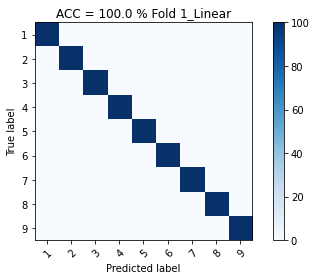

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         6

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Guardando... LogisticRegression_Fold1


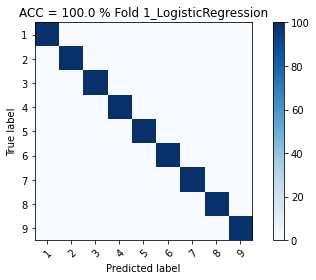

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         6

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Guardando... LinearSVC_Fold1


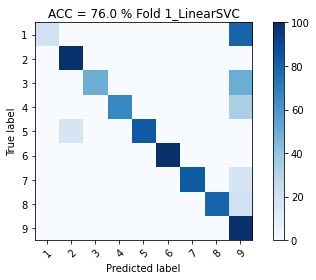

1it [2:16:53, 8213.90s/it]

              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5
           3       1.00      0.50      0.67         6
           4       1.00      0.67      0.80         6
           5       1.00      0.83      0.91         6
           6       1.00      1.00      1.00         5
           7       1.00      0.83      0.91         6
           8       1.00      0.80      0.89         5
           9       0.35      1.00      0.52         6

    accuracy                           0.76        50
   macro avg       0.91      0.76      0.77        50
weighted avg       0.91      0.76      0.77        50

Iteration =  2/3
Linear Model
Logistic Regression Model
Linear SVM Model
Guardando... Linear_Fold2


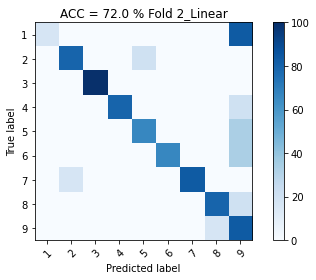

              precision    recall  f1-score   support

           1       1.00      0.17      0.29         6
           2       0.80      0.80      0.80         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       0.80      0.67      0.73         6
           6       1.00      0.67      0.80         6
           7       1.00      0.83      0.91         6
           8       0.80      0.80      0.80         5
           9       0.31      0.83      0.45         6

    accuracy                           0.72        50
   macro avg       0.86      0.73      0.74        50
weighted avg       0.85      0.72      0.73        50

Guardando... LogisticRegression_Fold2


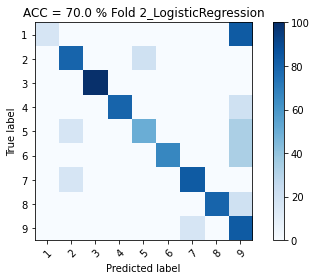

              precision    recall  f1-score   support

           1       1.00      0.17      0.29         6
           2       0.67      0.80      0.73         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       0.75      0.50      0.60         6
           6       1.00      0.67      0.80         6
           7       0.83      0.83      0.83         6
           8       1.00      0.80      0.89         5
           9       0.31      0.83      0.45         6

    accuracy                           0.70        50
   macro avg       0.84      0.71      0.72        50
weighted avg       0.83      0.70      0.71        50

Guardando... LinearSVC_Fold2


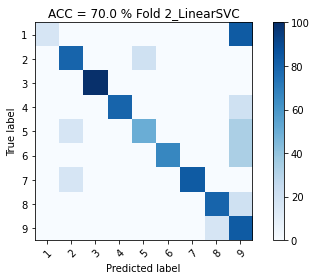

2it [4:32:47, 8195.68s/it]

              precision    recall  f1-score   support

           1       1.00      0.17      0.29         6
           2       0.67      0.80      0.73         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       0.75      0.50      0.60         6
           6       1.00      0.67      0.80         6
           7       1.00      0.83      0.91         6
           8       0.80      0.80      0.80         5
           9       0.31      0.83      0.45         6

    accuracy                           0.70        50
   macro avg       0.84      0.71      0.72        50
weighted avg       0.83      0.70      0.71        50

Iteration =  3/3
Linear Model
Logistic Regression Model
Linear SVM Model
Guardando... Linear_Fold3


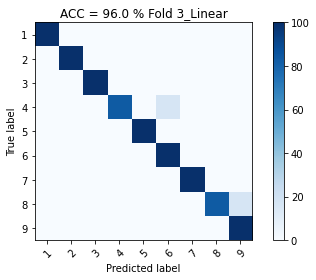

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         5
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00         6
           8       1.00      0.83      0.91         6
           9       0.83      1.00      0.91         5

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.97      0.96      0.96        50

Guardando... LogisticRegression_Fold3


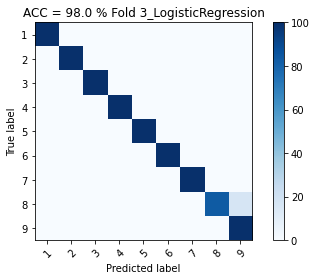

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         6
           8       1.00      0.83      0.91         6
           9       0.83      1.00      0.91         5

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Guardando... LinearSVC_Fold3


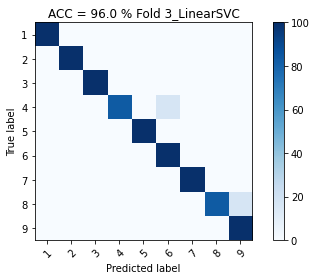

3it [6:48:40, 8173.56s/it]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         5
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00         6
           8       1.00      0.83      0.91         6
           9       0.83      1.00      0.91         5

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.97      0.96      0.96        50



In [ ]:
# Traininig/Testing loop

for train_index, test_index in tqdm(sss.split(X,y)):
    # Training/testing index storage
    train_idx += [train_index]
    test_idx  += [test_index]
    
    # Number of partitions flag
    fold = fold + 1
    print("Iteration = ", str(fold) +'/'+ str(n_partitions))
    
    # Iteration file name 
    filename = img_path + "/Fold" + str(fold)
    
    # Train/Test 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # ---------------------------------------------------------------------------------------------------------------------------
    # Training
    
    # Linear
    print('Linear Model')
    # Using GridSearchCV 
    # hs_Lineal = GridSearchCV(Pipeline(steps[0]), parameters[0], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_Lineal = RandomizedSearchCV(Pipeline(steps[0]), param_distributions=parameters[0],n_iter=10, cv=5, iid=False, n_jobs=-1)
    hs_Lineal.fit(X_train,y_train)
    nfeats_L     += [hs_Lineal.best_estimator_.named_steps['FeatureSelectnRel'].n_features_to_select]
    sel_fts_L    += [hs_Lineal.best_estimator_.named_steps['FeatureSelectnRel'].top_features_]
    scores_rlff_L+= [hs_Lineal.best_estimator_.named_steps['FeatureSelectnRel'].feature_importances_]


    # Logistic Regression
    print('Logistic Regression Model')
    # Usaing GridSearchCV 
    # hs_LogR = GridSearchCV(Pipeline(steps[1]), parameters[1], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_LogR = RandomizedSearchCV(Pipeline(steps[1]), param_distributions=parameters[1],n_iter=10, cv=5, iid=False,n_jobs=-1)
    hs_LogR.fit(X_train,y_train)
    # Features selected by ReliefF method
    nfeats_LogR     += [hs_LogR.best_estimator_.named_steps['FeatureSelectnRel'].n_features_to_select]
    sel_fts_LogR    += [hs_LogR.best_estimator_.named_steps['FeatureSelectnRel'].top_features_]
    scores_rlff_LogR+= [hs_LogR.best_estimator_.named_steps['FeatureSelectnRel'].feature_importances_]
  

    # Linear SVM
    print('Linear SVM Model')
    # Using GridSearchCV 
    #hs_lSVM = GridSearchCV(Pipeline(steps[2]), parameters[2], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_lSVM = RandomizedSearchCV(Pipeline(steps[2]), param_distributions=parameters[2],n_iter=10, cv=5, iid=False, n_jobs=-1)  
    hs_lSVM.fit(X_train,y_train)
    # Features selected by ReliefF method
    nfeats_lSVM     += [hs_lSVM.best_estimator_.named_steps['FeatureSelectnRel'].n_features_to_select]
    sel_fts_lSVM    += [hs_lSVM.best_estimator_.named_steps['FeatureSelectnRel'].top_features_]
    scores_rlff_lSVM+= [hs_lSVM.best_estimator_.named_steps['FeatureSelectnRel'].feature_importances_]

    # ---------------------------------------------------------------------------------------------------------------------------
    # Validation
    
    # Linear
    y_pred_L           = hs_Lineal.best_estimator_.predict(X_test)
    accuracy_L[fold-1] = accuracy_score(y_test,y_pred_L)
    cm_temp            = confusion_matrix(y_test,y_pred_L)
    cm_L[fold-1,:,:]   = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_L, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_L[fold-1],fold) + '_'+ label_models[0])
    plt.autoscale()
    save_fig(img_path,label_models[0]+'_Fold'+str(fold))                      
    plt.show()
    cr_L += [classification_report(y_test,y_pred_L)]
    print(cr_L[-1])
    # Best model storage
    # best_mod_L += [hs_Lineal.best_estimator_, accuracy_L,cm_L,cr_L, sel_fts_L]
    # best_mod_L += [hs_Lineal.best_estimator_]
    best_pms_L += [hs_Lineal.best_params_,nfeats_L,sel_fts_L,scores_rlff_L,accuracy_L,cm_L,cr_L]


    # Logistic Regression
    y_pred_LogR          = hs_LogR.best_estimator_.predict(X_test)
    accuracy_LogR[fold-1]= accuracy_score(y_test,y_pred_LogR)
    cm_temp              = confusion_matrix(y_test,y_pred_LogR)
    cm_LogR[fold-1,:,:]  = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_LogR, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_LogR[fold-1],fold) + '_'+ label_models[1])
    plt.autoscale()
    save_fig(img_path,label_models[1]+'_Fold'+str(fold))                      
    plt.show()
    cr_LogR += [classification_report(y_test,y_pred_LogR)]
    print(cr_LogR[-1])
    # Best model storage
    # best_mod_LogR += [hs_LogR.best_estimator_, accuracy_LogR,cm_LogR,cr_LogR, sel_fts_LogR]
    # best_mod_LogR += [hs_LogR.best_estimator_]
    best_pms_LogR += [hs_LogR.best_params_,nfeats_LogR,sel_fts_LogR,scores_rlff_LogR,accuracy_LogR,cm_LogR,cr_LogR]


    # Linear SVM
    y_pred_lSVM          = hs_lSVM.best_estimator_.predict(X_test)
    accuracy_lSVM[fold-1]= accuracy_score(y_test,y_pred_lSVM)
    cm_temp              = confusion_matrix(y_test,y_pred_lSVM)
    cm_LogR[fold-1,:,:]  = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_lSVM, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_lSVM[fold-1],fold) + '_'+ label_models[2])
    plt.autoscale()
    save_fig(img_path,label_models[2]+'_Fold'+str(fold))                      
    plt.show()
    cr_lSVM += [classification_report(y_test,y_pred_lSVM)]
    print(cr_lSVM[-1])
    # Best model storage
    # best_mod_lSVM += [hs_lSVM.best_estimator_, accuracy_lSVM,cm_lSVM,cr_lSVM, sel_fts_lSVM]
    # best_mod_lSVM += [hs_lSVM.best_estimator_]
    best_pms_lSVM += [hs_lSVM.best_params_,nfeats_lSVM,sel_fts_lSVM,scores_rlff_lSVM,accuracy_lSVM,cm_lSVM,cr_lSVM]

Storing the feature selection results

In [ ]:
# Results dictionary creation
L_dict = {'accuracy_L': accuracy_L,
          'cm_L': cm_L,
          'cr_L': cr_L,
          'sel_fts_L':sel_fts_L,
          'scores_rlff_L':scores_rlff_L,
          'nfeats_L': nfeats_L}

LogR_dict = {'accuracy_LogR': accuracy_LogR,
            'cm_LogR': cm_LogR,
            'cr_LogR': cr_LogR,
            'sel_fts_LogR':sel_fts_LogR,
            'scores_rlff_LogR':scores_rlff_LogR,
            'nfeats_LogR': nfeats_LogR}

lSVM_dict = {'accuracy_lSVM': accuracy_lSVM,
            'cm_lSVM': cm_lSVM,
            'cr_lSVM': cr_lSVM,
            'sel_fts_lSVM':sel_fts_lSVM,
            'scores_rlff_lSVM':scores_rlff_lSVM,
            'nfeats_lSVM': nfeats_lSVM}

Results = [L_dict, LogR_dict, lSVM_dict]

joblib.dump(Results, rslt_dir + ".pkl")

['/content/Databases/Kimia99Shape_DB/FeatureSelection/Kimia99ShapeDB_BoCF_E_Results/Results_BoCF_E_Py.pkl']

The number of features is reported according to the best feature selection result

In [ ]:
n_folds     = 10
hist_ftr_vec= np.zeros((len(Results),len(list(Results[0].values())[3][0])))
mean_ftr_vec= np.zeros((10,1))

# Loop to run over results lists:
for i in range(0,len(Results)):
    # Matrix creation to count feature appearances
    temp_matrix = np.zeros((n_folds,len(list(Results[i].values())[3][0])))
    # Loop to iterate over dictionary entries:
    for l in Results[i]:
        # Loop to run over list of selected features:
        for j in range(0,n_folds):
            if l == 'sel_fts_L' or l == 'sel_fts_LogR' or l == 'sel_fts_lSVM':
                temp_vec    = Results[i][l][j][0:list(Results[i].values())[5][j]]
                temp_matrix[j][temp_vec] = 1
    # Vector of feature appearances
    hist_ftr_vec[i][:] = np.sum(temp_matrix,axis = 0)
    mean_ftr_vec[i]    = np.mean(Results[i][l])
    
# Printing results:
print('Linear Classifier')
print(str(np.mean(np.array(Results[0]['accuracy_L']))*100) + '+/-' + str(np.std(np.array(Results[0]['accuracy_L']))*100))
print('Number of features = ' + str(mean_ftr_vec[0]))

print('Logistic Regression Classifier')
print(str(np.mean(np.array(Results[1]['accuracy_LogR']))*100) + '+/-' + str(np.std(np.array(Results[1]['accuracy_LogR']))*100))
print('Number of features = ' + str(mean_ftr_vec[1]))

print('Linear SVM Classifier')
print(str(np.mean(np.array(Results[2]['accuracy_lSVM']))*100) + '+/-' + str(np.std(np.array(Results[2]['accuracy_lSVM']))*100))
print('Number of features = ' + str(mean_ftr_vec[2]))

Linear Classifier
89.33333333333331+/-12.36482466066094
Number of features = [8000.]
Logistic Regression Classifier
89.33333333333331+/-13.695092389449426
Number of features = [4500.]
Linear SVM Classifier
80.66666666666666+/-11.115554667022044
Number of features = [9500.]


In [ ]:
from scipy.spatial.distance import cdist
# Ideal Result
Target       = np.array((100,0,0))
# Computing the minimum distance between the ideal result and our results
dist         = cdist(Target.reshape(1,-1),np.array(([np.mean(np.array(Results[0]['accuracy_L']))*100,np.std(np.array(Results[0]['accuracy_L']))*100,9675/31500],[np.mean(np.array(Results[1]['accuracy_LogR']))*100,np.std(np.array(Results[1]['accuracy_LogR']))*100,9225/31500],[np.mean(np.array(Results[2]['accuracy_lSVM']))*100,np.std(np.array(Results[2]['accuracy_lSVM']))*100,9375/31500])), 'euclidean')
print(dist)

Region-based histogram building

In [ ]:
n_regions    = 21
G            = 1500           # Number of cetroid from BoCF dictionary learning
expected_feat= G*n_partitions # Expected number of features per region and fold
size         = len(list(Results[0].values())[3][0])
features     = np.arange(1,size+1,1)
region_vec   = np.arange(0,n_regions+1)*G
hist_region  = np.zeros((n_regions,3))
hist_region_s= np.zeros((n_regions,3))
region_vec_p = np.arange(1,n_regions+1)
hist_ftr_mat = np.concatenate((hist_ftr_vec,features.reshape(size,1).T),axis = 0).T
# Histogram with prunning
idx                 = hist_ftr_vec >= 3 
hist_ftr_vec_sampled= np.where(idx,hist_ftr_vec,hist_ftr_vec*0)
hist_ftr_mat_sampled= np.concatenate((hist_ftr_vec_sampled,features.reshape(size,1).T),axis = 0).T
# Now, histograms per region are obtained
for i in range(0,len(region_vec)-1):
  for j in range(0,hist_ftr_mat.shape[1]-1):          
      hist_region[i,j]  = np.sum(hist_ftr_mat[region_vec[i]:region_vec[i+1],j])/expected_feat
      hist_region_s[i,j]= np.sum(hist_ftr_mat_sampled[region_vec[i]:region_vec[i+1],j])/expected_feat

In [ ]:
# Storing data to plot histograms in Latex
    
# According to the values, are extracted the non-zero values
idx_nz     = np.argsort(-1*hist_ftr_vec[2,:])
hist_vec_nz= hist_ftr_vec[2,idx_nz]
# features_nz= features[idx_nz]
hist_mat_nz= np.concatenate((hist_vec_nz.reshape(features.shape[0],1).T,features.reshape(features.shape[0],1).T),axis = 0).T
np.savetxt(img_path + '/HistMatrix.dat', hist_mat_nz)

# For sampled histogram
idx_nz_s     = np.argsort(-1*hist_ftr_vec_sampled[2,:])
hist_vec_nz_s= hist_ftr_vec_sampled[2,idx_nz_s]
# features_nz_s= features[idx_nz_s]
hist_mat_nz_s= np.concatenate((hist_vec_nz_s.reshape(features.shape[0],1).T,features.reshape(features.shape[0],1).T),axis = 0).T
np.savetxt(img_path + '/HistMatrixSampled.dat', hist_mat_nz_s) 

Text(0.5, 0, 'Regions')

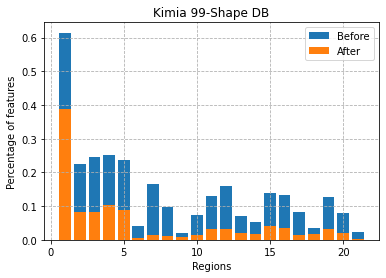

In [ ]:
# Plotting the histograms before and after apperance criteria is applied
plt.figure()
plt.title('Kimia 99-Shape DB')
plt.bar(region_vec_p,hist_region[:,1], label = 'Before')
plt.bar(region_vec_p,hist_region_s[:,1], label = 'After')
plt.legend()
plt.grid(linestyle='--')
plt.ylabel('Percentage of features')
plt.xlabel('Regions')

Feature selection indexing over the input matrix

In [ ]:
# Input matrix indexing
Xr = X.values
# Reduced matrix from feature selection indices
Xr = Xr[:,idx[1,:]]
Results = [hist_ftr_vec,hist_ftr_vec_sampled,Xr]
joblib.dump(Results, img_path + "ReductionSetResults"+ ".pkl")

# **Step 4: Centered Kernel Alignment projection**

Model description

In [ ]:
# Matrix declaration to store train/test matrices and their labels, and projection matrices from CKA
X_train_cka = []
X_test_cka  = []
y_train_cka = []
y_test_cka  = []
W_cka_L     = []
W_cka_LogR  = []
W_cka_lSVM  = []
    
# Step declaration
steps = [
        [('Preprocessing', StandardScaler()),
          ('Projection', MiniBatchCKA(Q = 0.95)),
          ('Preprocessing2',StandardScaler()),
          ('Classification',SGDClassifier())],      # Clasificador Lineal
        [('Preprocessing', StandardScaler()),
          ('Projection', MiniBatchCKA(Q = 0.95)),
          ('Preprocessing2',StandardScaler()),
          ('Classification',LogisticRegression())], # Regresion Logistica
        [('Preprocessing', StandardScaler()),
          ('Projection', MiniBatchCKA(Q = 0.95)),
          ('Preprocessing2',StandardScaler()),
          ('Classification',LinearSVC())],          # Maquina de Vectores de Soporte
        ]
    
# Grid declaration
parameters = [
            {'Classification__penalty': ['l1', 'l2', 'elasticnet'] },
            {'Classification__C': [0.01,0.1,1,10]},
            {'Classification__C': [0.1,1,10,100,1000]}
            ]

# Model labels
label_models = ['LinearCKA','LogisticRegressionCKA','LinearSVCKA']

In [ ]:
# Directory to save results and plots

rslt_dir     = img_dir + '/NLDR/Animals_DB_CKA_Results/Results_CKA_NLDR_Py'
img_path     = img_dir + '/NLDR/Animals_DB_CKA_Results'

Loop to optimize CKA projection

0it [00:00, ?it/s]

Iteration =  1/3
Linear Model
it:1/50---cost:-1.71e+00--- elapsed:0.03 [s]



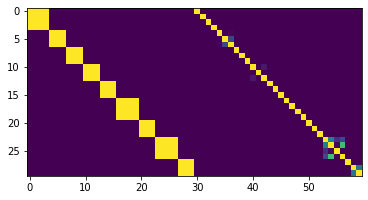

Logistic Regression Model
it:1/50---cost:-1.69e+00--- elapsed:0.03 [s]



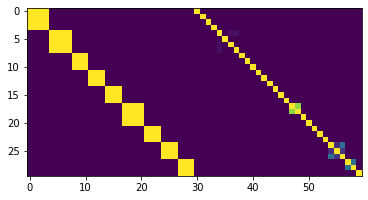

Linear SVM Model
it:1/50---cost:-1.76e+00--- elapsed:0.03 [s]



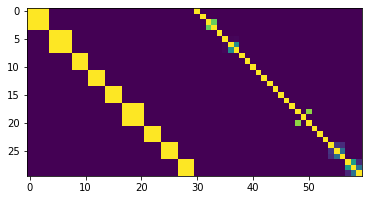

Guardando... LinearCKA_Fold1


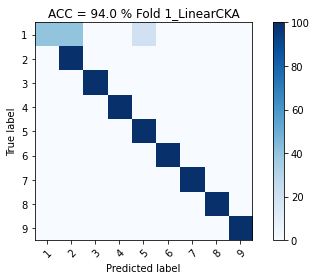

              precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       0.86      1.00      0.92         6
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         6

    accuracy                           0.94        50
   macro avg       0.95      0.93      0.93        50
weighted avg       0.95      0.94      0.93        50

Guardando... LogisticRegressionCKA_Fold1


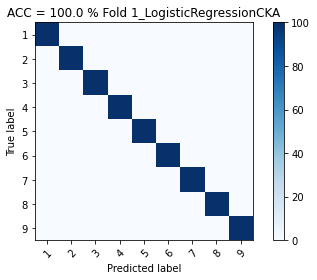

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         6

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Guardando... LinearSVCKA_Fold1


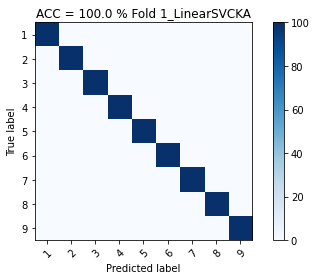

1it [00:05,  5.16s/it]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         6

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Iteration =  2/3
Linear Model
it:1/50---cost:-1.72e+00--- elapsed:0.03 [s]



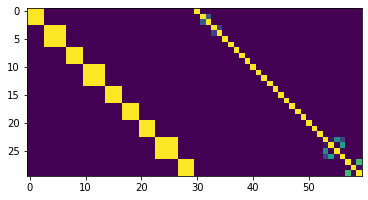

Logistic Regression Model
it:1/50---cost:-1.70e+00--- elapsed:0.03 [s]



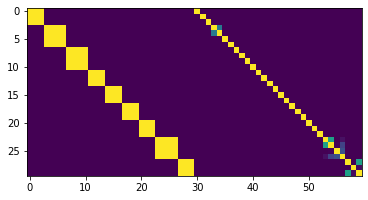

Linear SVM Model
it:1/50---cost:-1.79e+00--- elapsed:0.03 [s]



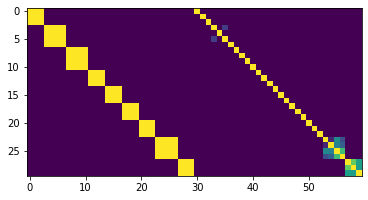

Guardando... LinearCKA_Fold2


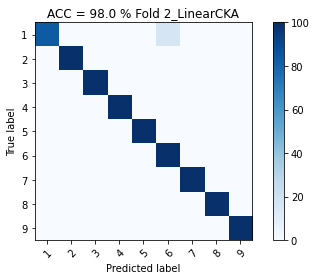

              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         6
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         6

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Guardando... LogisticRegressionCKA_Fold2


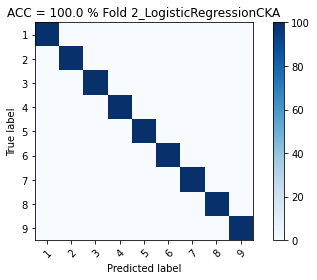

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         6

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Guardando... LinearSVCKA_Fold2


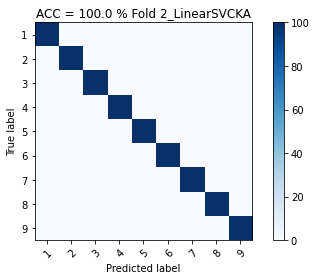

2it [00:10,  5.17s/it]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         6

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Iteration =  3/3
Linear Model
it:1/50---cost:-1.75e+00--- elapsed:0.03 [s]



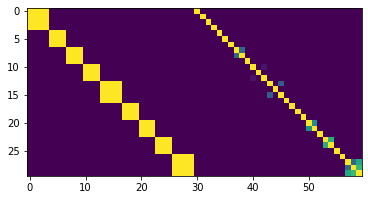

Logistic Regression Model
it:1/50---cost:-1.74e+00--- elapsed:0.03 [s]



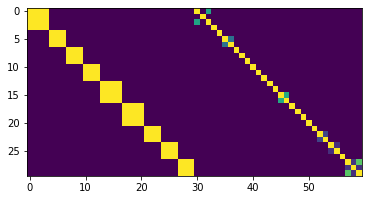

Linear SVM Model
it:1/50---cost:-1.75e+00--- elapsed:0.03 [s]



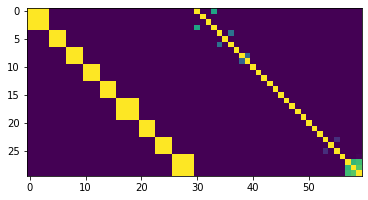

Guardando... LinearCKA_Fold3


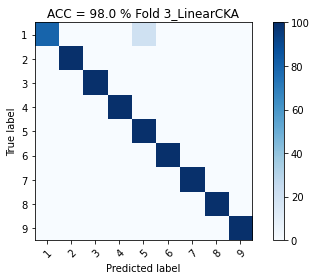

              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         5

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Guardando... LogisticRegressionCKA_Fold3


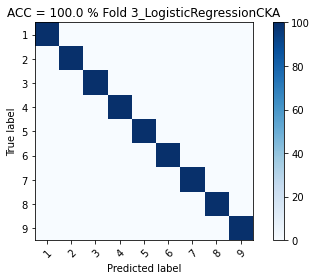

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         5

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Guardando... LinearSVCKA_Fold3


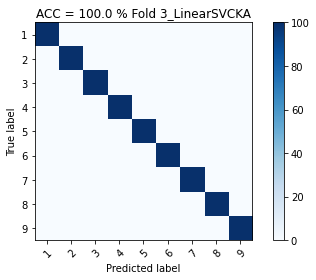

3it [00:15,  5.20s/it]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         5

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
# Traininig/Testing loop
fold = 0

for train_index, test_index in tqdm(sss.split(X,y)):
    # Training/testing index storage
    train_idx += [train_index]
    test_idx  += [test_index]
    
    # Number of partitions flag
    fold = fold + 1
    print("Iteration = ", str(fold) +'/'+ str(n_partitions))
    
    # Iteration file name 
    filename = img_path + "/Fold" + str(fold)

    # Train/Test partition and matrix storing to apply CKA over them for 
    # visualization
    X_train, X_test = Xr[train_index,:], Xr[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    X_train_cka += [X_train]
    X_test_cka  += [X_test]
    y_train_cka += [y_train]
    y_test_cka  += [y_test]

    # ---------------------------------------------------------------------------------------------------------------------------
    # Training
    
    # Linear
    print('Linear Model')
    # Using GridSearchCV 
    # hs_Lineal = GridSearchCV(Pipeline(steps[0]), parameters[0], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_Lineal = RandomizedSearchCV(Pipeline(steps[0]), param_distributions=parameters[0],n_iter=10, cv=5, iid=False, n_jobs=-1)
    hs_Lineal.fit(X_train,y_train)
    # Projection matrix from CKA
    W_cka_L += [hs_Lineal.best_estimator_.named_steps['Projection'].Wcka]


    # Logistic Regression
    print('Logistic Regression Model')
    # Usaing GridSearchCV 
    # hs_LogR = GridSearchCV(Pipeline(steps[1]), parameters[1], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_LogR = RandomizedSearchCV(Pipeline(steps[1]), param_distributions=parameters[1],n_iter=10, cv=5, iid=False,n_jobs=-1)
    hs_LogR.fit(X_train,y_train)
    # Projection matrix from CKA
    W_cka_LogR += [hs_LogR.best_estimator_.named_steps['Projection'].Wcka]
  

    # Linear SVM
    print('Linear SVM Model')
    # Using GridSearchCV 
    #hs_lSVM = GridSearchCV(Pipeline(steps[2]), parameters[2], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_lSVM = RandomizedSearchCV(Pipeline(steps[2]), param_distributions=parameters[2],n_iter=10, cv=5, iid=False, n_jobs=-1)  
    hs_lSVM.fit(X_train,y_train)
    # Projection matrix from CKA
    W_cka_lSVM += [hs_lSVM.best_estimator_.named_steps['Projection'].Wcka]

    # ---------------------------------------------------------------------------------------------------------------------------
    # Validation
    
    # Linear
    y_pred_L           = hs_Lineal.best_estimator_.predict(X_test)
    accuracy_L[fold-1] = accuracy_score(y_test,y_pred_L)
    cm_temp            = confusion_matrix(y_test,y_pred_L)
    cm_L[fold-1,:,:]   = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_L, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_L[fold-1],fold) + '_'+ label_models[0])
    plt.autoscale()
    save_fig(img_path,label_models[0]+'_Fold'+str(fold))                      
    plt.show()
    cr_L += [classification_report(y_test,y_pred_L)]
    print(cr_L[-1])
    # Best model storage
    # best_mod_L += [hs_Lineal.best_estimator_, accuracy_L,cm_L,cr_L, sel_fts_L]
    # best_mod_L += [hs_Lineal.best_estimator_]
    best_pms_L += [hs_Lineal.best_params_,accuracy_L,cm_L,cr_L,W_cka_L]
    joblib.dump(best_pms_L, filename + "LinealCKA" + ".pkl")


    # Logistic Regression
    y_pred_LogR          = hs_LogR.best_estimator_.predict(X_test)
    accuracy_LogR[fold-1]= accuracy_score(y_test,y_pred_LogR)
    cm_temp              = confusion_matrix(y_test,y_pred_LogR)
    cm_LogR[fold-1,:,:]  = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_LogR, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_LogR[fold-1],fold) + '_'+ label_models[1])
    plt.autoscale()
    save_fig(img_path,label_models[1]+'_Fold'+str(fold))                      
    plt.show()
    cr_LogR += [classification_report(y_test,y_pred_LogR)]
    print(cr_LogR[-1])
    # Best model storage
    # best_mod_LogR += [hs_LogR.best_estimator_, accuracy_LogR,cm_LogR,cr_LogR, sel_fts_LogR]
    # best_mod_LogR += [hs_LogR.best_estimator_]
    best_pms_LogR += [hs_LogR.best_params_,accuracy_LogR,cm_LogR,cr_LogR,W_cka_LogR]
    joblib.dump(best_pms_LogR, filename + "LogRCKA" + ".pkl")


    # Linear SVM
    y_pred_lSVM          = hs_lSVM.best_estimator_.predict(X_test)
    accuracy_lSVM[fold-1]= accuracy_score(y_test,y_pred_lSVM)
    cm_temp              = confusion_matrix(y_test,y_pred_lSVM)
    cm_LogR[fold-1,:,:]  = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_lSVM, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_lSVM[fold-1],fold) + '_'+ label_models[2])
    plt.autoscale()
    save_fig(img_path,label_models[2]+'_Fold'+str(fold))                      
    plt.show()
    cr_lSVM += [classification_report(y_test,y_pred_lSVM)]
    print(cr_lSVM[-1])
    # Best model storage
    # best_mod_lSVM += [hs_lSVM.best_estimator_, accuracy_lSVM,cm_lSVM,cr_lSVM, sel_fts_lSVM]
    # best_mod_lSVM += [hs_lSVM.best_estimator_]
    best_pms_lSVM += [hs_lSVM.best_params_,accuracy_lSVM,cm_lSVM,cr_lSVM,W_cka_lSVM]
    joblib.dump(best_pms_lSVM, filename + "lSVMCKA" + ".pkl")

Storing the CKA projection results

In [ ]:
# Results dictionary creation
L_dict = {'accuracy_L': accuracy_L,
          'cm_L': cm_L,
          'cr_L': cr_L,
          'W_cka_L': W_cka_L,
          'X_train_cka': X_train_cka,
          'X_test_cka': X_test_cka,
          'y_train_cka':y_train_cka,
          'y_test_cka':y_test_cka}

LogR_dict = {'accuracy_LogR': accuracy_LogR,
            'cm_LogR': cm_LogR,
            'cr_LogR': cr_LogR,
            'W_cka_LogR': W_cka_LogR,
            'X_train_cka': X_train_cka,
            'X_test_cka': X_test_cka,
            'y_train_cka':y_train_cka,
            'y_test_cka':y_test_cka}

lSVM_dict = {'accuracy_lSVM': accuracy_lSVM,
            'cm_lSVM': cm_lSVM,
            'cr_lSVM': cr_lSVM,
            'W_cka_lSVM': W_cka_lSVM,
            'X_train_cka': X_train_cka,
            'X_test_cka': X_test_cka,
            'y_train_cka':y_train_cka,
            'y_test_cka':y_test_cka}

Results = [L_dict, LogR_dict, lSVM_dict]

joblib.dump(Results, rslt_dir + ".pkl")

['/content/Databases/Kimia99Shape_DB/NLDR/Kimia99Shape_DB_CKA_Results/Results_CKA_NLDR_Py.pkl']

Average result printing

In [ ]:
print('Linear Classifier')
print(str(np.mean(np.array(Results[0]['accuracy_L']))*100) + '+/-' + str(np.std(np.array(Results[0]['accuracy_L']))*100))

print('Logistic Regression Classifier')
print(str(np.mean(np.array(Results[1]['accuracy_LogR']))*100) + '+/-' + str(np.std(np.array(Results[1]['accuracy_LogR']))*100))

print('Linear SVM Classifier')
print(str(np.mean(np.array(Results[2]['accuracy_lSVM']))*100) + '+/-' + str(np.std(np.array(Results[2]['accuracy_lSVM']))*100))

Linear Classifier
96.66666666666667+/-1.8856180831641285
Logistic Regression Classifier
100.0+/-0.0
Linear SVM Classifier
100.0+/-0.0


Projection matrix plotting

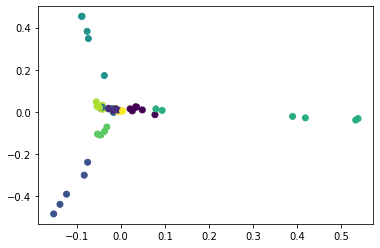

In [ ]:
W    = Results[1]['W_cka_LogR'][0]
Xp   = X_train_cka[0].dot(W)
# Plotting the projection matrix
plt.scatter(Xp[:,1],Xp[:,2],c = y_train_cka[0])

# **Step 5: Region Selection**

The algorithm now runs over the regions to know whose are more informative than others

In [ ]:
# Declaracion de variables
n_partitions = 10
test_per     = 0.695
n_classes    = len(np.unique(y))
f_step       = 1500
ftr_vec      = np.arange(f_step,int((X.shape[1]))+f_step,f_step).astype(int)
fold         = 0
# Arrays and lists to store at each fold
train_idx    = []
test_idx     = []
accuracy_L   = np.zeros((n_partitions,len(ftr_vec)))
accuracy_LogR= np.zeros((n_partitions,len(ftr_vec)))
accuracy_lSVM= np.zeros((n_partitions,len(ftr_vec)))
cm_L         = np.zeros((n_partitions,n_classes,n_classes))
cm_LogR      = np.zeros((n_partitions,n_classes,n_classes))
cm_lSVM      = np.zeros((n_partitions,n_classes,n_classes))
cr_L         = []
cr_LogR      = []
cr_lSVM      = []
best_mod_L   = []
best_mod_LogR= []
best_mod_lSVM= []
best_pms_L   = []
best_pms_LogR= []
best_pms_lSVM= []

In [ ]:
# Setting the data partition scheme to work like HoldOut validation
sss = StratifiedShuffleSplit(n_splits = n_partitions, test_size = test_per, random_state=42)

In [ ]:
# Step declaration
steps = [
        [('Preprocessing', StandardScaler()),
          ('Classification',SGDClassifier())],      # Clasificador Lineal
        ]
    
# Grid declaration
parameters = [
            {'Classification__penalty': ['l1', 'l2', 'elasticnet'] },
            ]

# Model labels
label_models = ['Linear']

In [ ]:
# Directory to save results and plots

rslt_dir     = img_dir + '/RegionSelection/RS_BoCF/Results_RS_BoCF_Py'
sys.path.append(rslt_dir)
img_path     = img_dir + '/RegionSelection/RS_BoCF/'
sys.path.append(img_path)

In [ ]:
# Traininig/Testing loop

for feature in range(0,len(ftr_vec)): # For loop over regions
  print("Region = ", str(feature+1) +'/'+ str(21))
  fold = 0
  # Initializa variables
  train_idx    = []
  test_idx     = []
  cm_L         = np.zeros((n_partitions,n_classes,n_classes))
  cr_L         = []
  best_mod_L   = []
  best_pms_L   = []
  for train_index, test_index in tqdm(sss.split(X,y)):
      # Training/testing index storage
      train_idx += [train_index]
      test_idx  += [test_index]
      
      # Number of partitions flag
      fold = fold + 1
      print("Iteration = ", str(fold) +'/'+ str(n_partitions))
      
      # Iteration file name 
      filename = img_path + "/Fold" + str(fold) + "Region" + str(feature+1)

      # Train/Test partition and matrix storing to apply CKA over them for 
      # visualization
      X_train, X_test = X[train_index,0:ftr_vec[feature]], X[test_index,0:ftr_vec[feature]]
      y_train, y_test = y[train_index], y[test_index]

      # ---------------------------------------------------------------------------------------------------------------------------
      # Training
      
      # Linear
      print('Linear Model')
      # Using GridSearchCV 
      hs_Lineal = GridSearchCV(Pipeline(steps[0]), parameters[0], n_jobs = 25, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
      # Using RandomizedSearchCV
      # hs_Lineal = RandomizedSearchCV(Pipeline(steps[0]), param_distributions=parameters[0],n_iter=10, cv=5, iid=False, n_jobs=2)
      hs_Lineal.fit(X_train,y_train)
      # Projection matrix from CKA
      # W_cka_L += [hs_Lineal.best_estimator_.named_steps['Projection'].Wcka]


      # ---------------------------------------------------------------------------------------------------------------------------
      # Validation
      
      # Linear
      y_pred_L           = hs_Lineal.best_estimator_.predict(X_test)
      accuracy_L[fold-1,feature] = accuracy_score(y_test,y_pred_L)
      cm_temp            = confusion_matrix(y_test,y_pred_L)
      cm_L[fold-1,:,:]   = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
      plot_confusion_matrix(y_test, y_pred_L, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_L[fold-1,feature],fold) + '_'+ label_models[0])
      plt.autoscale()
      save_fig(img_path,label_models[0]+'_Fold'+str(fold)+ "Region" + str(feature+1))                      
      plt.show()
      cr_L += [classification_report(y_test,y_pred_L)]
      print(cr_L[-1])
      # Best model storage
      # best_mod_L += [hs_Lineal.best_estimator_, accuracy_L,cm_L,cr_L, sel_fts_L]
      # best_mod_L += [hs_Lineal.best_estimator_]
      # best_pms_L += [hs_Lineal.best_params_,accuracy_L,cm_L,cr_L,W_cka_L]
      best_pms_L += [hs_Lineal.best_params_]
      # joblib.dump(best_pms_L, filename + "LinealCKA" + ".pkl")

  # Results dictionary creation
  L_dict = {'accuracy_L': accuracy_L,
            'cm_L': cm_L,
            'cr_L': cr_L,
            'best_pms_L':best_pms_L}

  Results = [L_dict]

  joblib.dump(Results, rslt_dir + "Region" + str(feature+1) +".pkl")

In [ ]:
# Get mean and standard deviation vectors 
mean_vec_l    = np.mean(Results[0]['accuracy_L'], axis = 0)
std_vec_l     = np.std(Results[0]['accuracy_L'], axis = 0)
# mean_vec_lr   = np.mean(Results[1]['accuracy_LogR'], axis = 0)
# std_vec_lr    = np.std(Results[1]['accuracy_LogR'], axis = 0)
# mean_vec_lsvm = np.mean(Results[2]['accuracy_lSVM'], axis = 0)
# std_vec_lsvm  = np.std(Results[2]['accuracy_lSVM'], axis = 0)
reg_vec  = np.arange(1,22,1)

# Plotting
plt.figure()
plt.plot(reg_vec,mean_vec_l)
plt.fill_between(reg_vec, mean_vec_l-std_vec_l, mean_vec_l+std_vec_l, alpha=0.2)
# plt.ylim(0.7,0.9)
# # plt.plot(reg_vec,mean_vec_lr)
# # plt.fill_between(reg_vec, mean_vec_lr-std_vec_lr, mean_vec_lr+std_vec_lr, alpha=0.2)
# # plt.plot(reg_vec,mean_vec_lsvm)
# # plt.fill_between(reg_vec, mean_vec_lsvm-std_vec_lsvm, mean_vec_lsvm+std_vec_lsvm, alpha=0.2)
plt.xticks(reg_vec, reg_vec)

In [ ]:
# Storing the data
Data = np.c_[reg_vec.reshape(1,-1).T,mean_vec_l.T,std_vec_l.T]
np.savetxt(img_path + '/ADBRSL.dat', Data, delimiter='   ')

In [ ]:
# Computing optimal number of regiones acording to target
Results      = np.loadtxt(img_path + 'ADBRSL.dat')
# Normalizing the number of regions
Results[:,0] = Results[:,0] - min(Results[:,0])
Results[:,0] = Results[:,0]/max(Results[:,0])
# Normalizing the accuracy
Results[:,1] = Results[:,1] - min(Results[:,1])
Results[:,1] = Results[:,1]/max(Results[:,1])
# Normalizing the standard deviation
Results[:,2] = Results[:,2] - min(Results[:,2])
Results[:,2] = Results[:,2]/max(Results[:,2])
# Ideal result
Target       = np.array((0,1,0))
# Computing the minimum distance between the ideal result and our results
dist         = cdist(Target.reshape(1,-1),Results, 'euclidean')
# Showing the optimum number of regions
print('The ideal number of regions is: ' + str((np.argmin(dist)+1)))

The ideal number of regions is: 5


# **Step 6: Projecting the selected regions using CKA**

In [ ]:
# Selecting the regions to project
X       = X.values[:,0:7500]

In [ ]:
# Variable declaration
n_partitions = 10
test_per     = 0.5
n_classes    = len(np.unique(y))
fold         = 0
train_idx    = []
test_idx     = []
alpha_L      = []
alpha_LogR   = []
alpha_lSVM   = []
sel_fts_L    = []
sel_fts_LogR = []
sel_fts_lSVM = []
thld_L       = []
thld_LogR    = []
thld_lSVM    = []
sel_fts_Lt   = []
sel_fts_LogRt= []
sel_fts_lSVMt= []
nfeats_L     = []
nfeats_LogR  = []
nfeats_lSVM  = []
accuracy_L   = np.zeros((n_partitions))
accuracy_LogR= np.zeros((n_partitions))
accuracy_lSVM= np.zeros((n_partitions))
cm_L         = np.zeros((n_partitions,n_classes,n_classes))
cm_LogR      = np.zeros((n_partitions,n_classes,n_classes))
cm_lSVM      = np.zeros((n_partitions,n_classes,n_classes))
cr_L         = []
cr_LogR      = []
cr_lSVM      = []
best_mod_L   = []
best_mod_LogR= []
best_mod_lSVM= []
best_pms_L   = []
best_pms_LogR= []
best_pms_lSVM= [] 

In [ ]:
# Matrix declaration to store train/test matrices and their labels, and projection matrices from CKA
X_train_cka = []
X_test_cka  = []
y_train_cka = []
y_test_cka  = []
W_cka_L     = []
W_cka_LogR  = []
W_cka_lSVM  = []
    
# Step declaration
steps = [
        [('Preprocessing', StandardScaler()),
          ('Projection', MiniBatchCKA(Q = 0.95)),
          ('Preprocessing2',StandardScaler()),
          ('Classification',SGDClassifier())],      # Clasificador Lineal
        [('Preprocessing', StandardScaler()),
          ('Projection', MiniBatchCKA(Q = 0.95)),
          ('Preprocessing2',StandardScaler()),
          ('Classification',LogisticRegression())], # Regresion Logistica
        [('Preprocessing', StandardScaler()),
          ('Projection', MiniBatchCKA(Q = 0.95)),
          ('Preprocessing2',StandardScaler()),
          ('Classification',LinearSVC())],          # Maquina de Vectores de Soporte
        ]
    
# Grid declaration
parameters = [
            {'Classification__penalty': ['l1', 'l2', 'elasticnet'] },
            {'Classification__C': [0.01,0.1,1,10]},
            {'Classification__C': [0.1,1,10,100,1000]}
            ]

# Model labels
label_models = ['LinearCKA','LogisticRegressionCKA','LinearSVCKA']

In [ ]:
# Setting the data partition scheme to work like HoldOut validation
sss = StratifiedShuffleSplit(n_splits = n_partitions, test_size = test_per, random_state=42)

In [ ]:
# Directory to save results and plots
rslt_dir     = img_dir + '/RegionSelection/ReliefF_CKA_RS_BoCF/Results_ReliefF_CKA_RS_BoCF_Py'
sys.path.append(rslt_dir)
img_path     = img_dir + '/RegionSelection/ReliefF_CKA_RS_BoCF/'
sys.path.append(img_path)

Loop to optimize CKA projection


0it [00:00, ?it/s]

Iteration =  1/10
Linear Model
it:1/50---cost:-1.66e+00--- elapsed:123.83 [s]



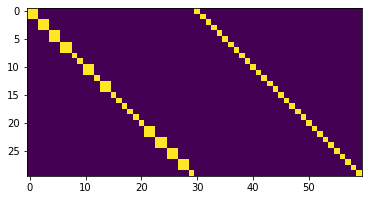

Logistic Regression Model
it:1/50---cost:-1.66e+00--- elapsed:75.61 [s]



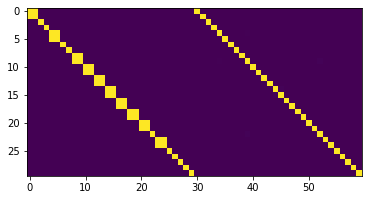

Linear SVM Model
it:1/50---cost:-1.66e+00--- elapsed:27.13 [s]



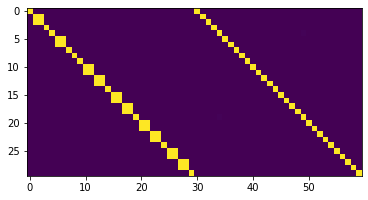

Guardando... LinearCKA_Fold1


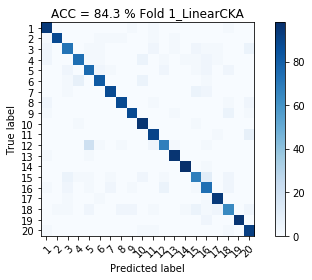

              precision    recall  f1-score   support

           1       0.81      0.94      0.87        50
           2       0.98      0.88      0.93        50
           3       0.77      0.72      0.74        50
           4       0.86      0.74      0.80        50
           5       0.69      0.76      0.72        50
           6       0.85      0.82      0.84        50
           7       0.90      0.88      0.89        50
           8       0.92      0.88      0.90        50
           9       0.92      0.88      0.90        50
          10       0.84      0.96      0.90        50
          11       0.83      0.90      0.87        50
          12       0.83      0.68      0.75        50
          13       0.92      0.96      0.94        50
          14       0.96      0.98      0.97        50
          15       0.74      0.68      0.71        50
          16       0.66      0.74      0.70        50
          17       0.90      0.94      0.92        50
          18       0.73    

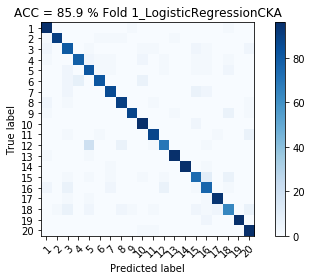

              precision    recall  f1-score   support

           1       0.83      0.96      0.89        50
           2       0.98      0.90      0.94        50
           3       0.71      0.80      0.75        50
           4       0.91      0.78      0.84        50
           5       0.69      0.82      0.75        50
           6       0.91      0.82      0.86        50
           7       0.86      0.86      0.86        50
           8       0.88      0.90      0.89        50
           9       0.96      0.88      0.92        50
          10       0.86      0.96      0.91        50
          11       0.90      0.88      0.89        50
          12       0.85      0.70      0.77        50
          13       0.96      0.96      0.96        50
          14       1.00      0.96      0.98        50
          15       0.76      0.74      0.75        50
          16       0.70      0.76      0.73        50
          17       0.94      0.94      0.94        50
          18       0.74    

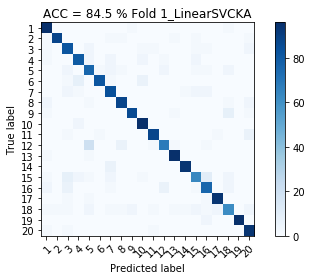

              precision    recall  f1-score   support

           1       0.80      0.96      0.87        50
           2       0.98      0.88      0.93        50
           3       0.72      0.82      0.77        50
           4       0.82      0.80      0.81        50
           5       0.66      0.76      0.70        50
           6       0.95      0.82      0.88        50
           7       0.76      0.84      0.80        50
           8       0.88      0.88      0.88        50
           9       0.93      0.86      0.90        50
          10       0.87      0.96      0.91        50
          11       0.92      0.88      0.90        50
          12       0.85      0.68      0.76        50
          13       0.92      0.96      0.94        50
          14       0.96      0.94      0.95        50
          15       0.76      0.64      0.70        50
          16       0.73      0.76      0.75        50
          17       0.94      0.94      0.94        50
          18       0.72    


1it [22:45, 1365.21s/it]

Iteration =  2/10
Linear Model
it:1/50---cost:-1.66e+00--- elapsed:194.55 [s]



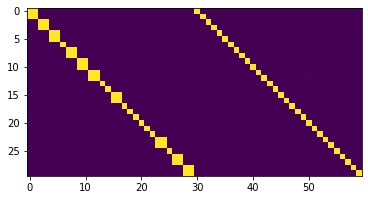

Logistic Regression Model
it:1/50---cost:-1.66e+00--- elapsed:195.23 [s]



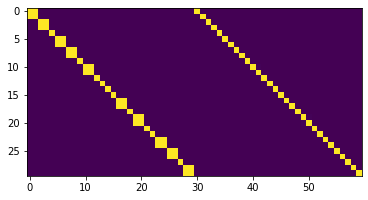

Linear SVM Model
it:1/50---cost:-1.66e+00--- elapsed:25.30 [s]



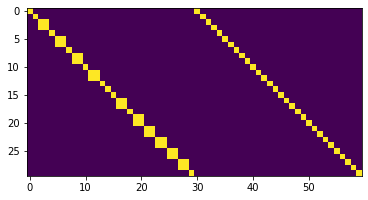

Guardando... LinearCKA_Fold2


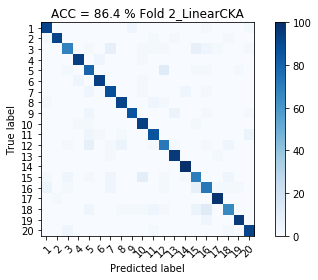

              precision    recall  f1-score   support

           1       0.88      0.92      0.90        50
           2       0.98      0.92      0.95        50
           3       0.83      0.68      0.75        50
           4       0.94      0.94      0.94        50
           5       0.73      0.80      0.76        50
           6       0.94      0.94      0.94        50
           7       0.81      0.88      0.85        50
           8       0.90      0.92      0.91        50
           9       0.93      0.86      0.90        50
          10       0.82      0.94      0.88        50
          11       0.84      0.86      0.85        50
          12       0.77      0.72      0.74        50
          13       0.91      0.96      0.93        50
          14       0.94      1.00      0.97        50
          15       0.73      0.70      0.71        50
          16       0.71      0.72      0.71        50
          17       0.94      0.98      0.96        50
          18       0.82    

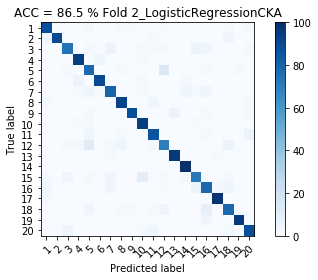

              precision    recall  f1-score   support

           1       0.86      0.88      0.87        50
           2       1.00      0.90      0.95        50
           3       0.86      0.74      0.80        50
           4       0.89      0.94      0.91        50
           5       0.70      0.78      0.74        50
           6       0.94      0.90      0.92        50
           7       0.82      0.80      0.81        50
           8       0.88      0.92      0.90        50
           9       0.96      0.88      0.92        50
          10       0.82      0.94      0.88        50
          11       0.84      0.86      0.85        50
          12       0.73      0.70      0.71        50
          13       0.94      0.96      0.95        50
          14       0.93      1.00      0.96        50
          15       0.82      0.72      0.77        50
          16       0.75      0.78      0.76        50
          17       0.96      0.98      0.97        50
          18       0.80    

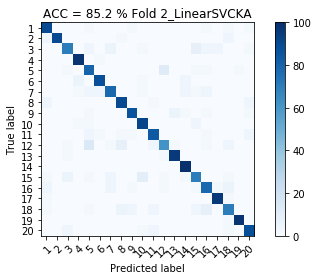

              precision    recall  f1-score   support

           1       0.83      0.90      0.87        50
           2       1.00      0.90      0.95        50
           3       0.81      0.70      0.75        50
           4       0.91      0.98      0.94        50
           5       0.69      0.80      0.74        50
           6       0.92      0.88      0.90        50
           7       0.83      0.78      0.80        50
           8       0.83      0.90      0.87        50
           9       0.90      0.86      0.88        50
          10       0.84      0.92      0.88        50
          11       0.86      0.84      0.85        50
          12       0.78      0.62      0.69        50
          13       0.92      0.96      0.94        50
          14       0.89      1.00      0.94        50
          15       0.76      0.70      0.73        50
          16       0.75      0.78      0.76        50
          17       0.94      0.96      0.95        50
          18       0.74    


2it [49:50, 1443.32s/it]

Iteration =  3/10
Linear Model
it:1/50---cost:-1.66e+00--- elapsed:41.25 [s]



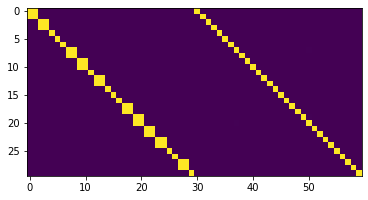

Logistic Regression Model
it:1/50---cost:-1.66e+00--- elapsed:28.47 [s]



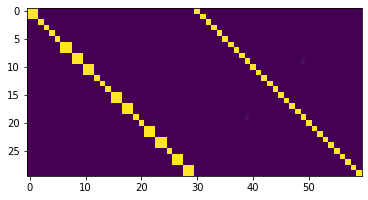

Linear SVM Model
it:1/50---cost:-1.67e+00--- elapsed:104.83 [s]



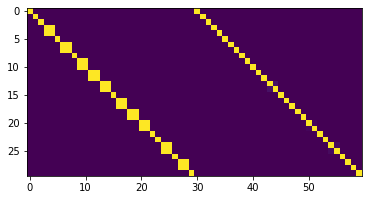

Guardando... LinearCKA_Fold3


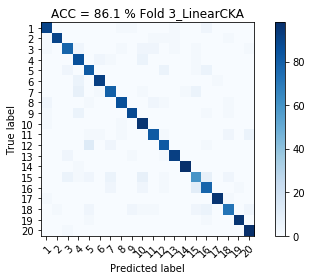

              precision    recall  f1-score   support

           1       0.87      0.90      0.88        50
           2       0.98      0.90      0.94        50
           3       0.83      0.78      0.80        50
           4       0.75      0.86      0.80        50
           5       0.76      0.82      0.79        50
           6       0.92      0.92      0.92        50
           7       0.83      0.80      0.82        50
           8       0.91      0.86      0.89        50
           9       0.92      0.88      0.90        50
          10       0.79      0.96      0.86        50
          11       0.87      0.82      0.85        50
          12       0.82      0.82      0.82        50
          13       0.94      0.92      0.93        50
          14       0.98      0.98      0.98        50
          15       0.70      0.60      0.65        50
          16       0.72      0.78      0.75        50
          17       0.98      0.96      0.97        50
          18       0.82    

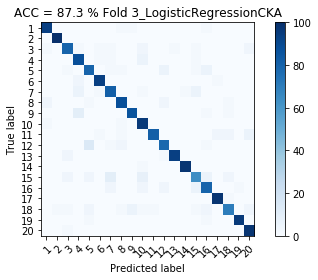

              precision    recall  f1-score   support

           1       0.92      0.94      0.93        50
           2       0.98      1.00      0.99        50
           3       0.85      0.80      0.82        50
           4       0.80      0.88      0.84        50
           5       0.75      0.80      0.78        50
           6       0.92      0.94      0.93        50
           7       0.79      0.82      0.80        50
           8       0.86      0.88      0.87        50
           9       0.91      0.86      0.89        50
          10       0.77      0.96      0.86        50
          11       0.98      0.82      0.89        50
          12       0.83      0.78      0.80        50
          13       0.98      0.94      0.96        50
          14       0.98      0.98      0.98        50
          15       0.76      0.64      0.70        50
          16       0.77      0.80      0.78        50
          17       0.94      0.98      0.96        50
          18       0.83    

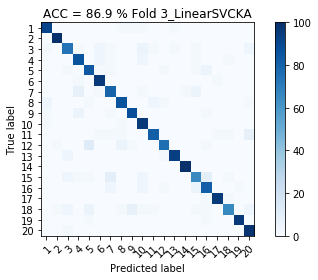

              precision    recall  f1-score   support

           1       0.90      0.92      0.91        50
           2       0.96      1.00      0.98        50
           3       0.82      0.74      0.78        50
           4       0.81      0.86      0.83        50
           5       0.78      0.84      0.81        50
           6       0.87      0.96      0.91        50
           7       0.77      0.80      0.78        50
           8       0.86      0.86      0.86        50
           9       0.88      0.88      0.88        50
          10       0.80      0.96      0.87        50
          11       0.91      0.82      0.86        50
          12       0.90      0.76      0.83        50
          13       0.96      0.94      0.95        50
          14       0.98      1.00      0.99        50
          15       0.77      0.66      0.71        50
          16       0.76      0.82      0.79        50
          17       0.96      0.96      0.96        50
          18       0.89    


3it [1:08:14, 1341.53s/it]

Iteration =  4/10
Linear Model
it:1/50---cost:-1.66e+00--- elapsed:21.88 [s]



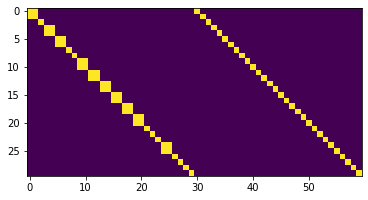

Logistic Regression Model
it:1/50---cost:-1.66e+00--- elapsed:41.63 [s]



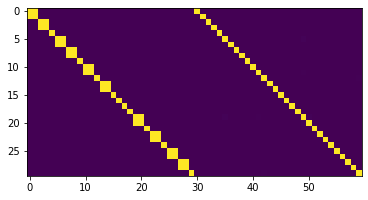

Linear SVM Model
it:1/50---cost:-1.66e+00--- elapsed:173.22 [s]



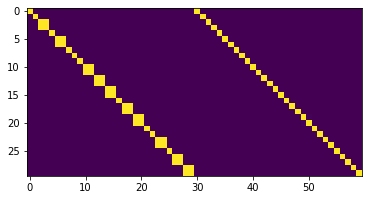

Guardando... LinearCKA_Fold4


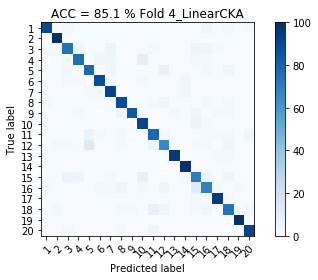

              precision    recall  f1-score   support

           1       0.94      0.90      0.92        50
           2       0.96      1.00      0.98        50
           3       0.79      0.74      0.76        50
           4       0.86      0.76      0.81        50
           5       0.78      0.78      0.78        50
           6       0.90      0.88      0.89        50
           7       0.82      0.92      0.87        50
           8       0.85      0.88      0.86        50
           9       0.98      0.84      0.90        50
          10       0.81      0.92      0.86        50
          11       0.78      0.78      0.78        50
          12       0.75      0.66      0.70        50
          13       0.98      0.96      0.97        50
          14       0.91      1.00      0.95        50
          15       0.66      0.70      0.68        50
          16       0.71      0.68      0.69        50
          17       0.91      0.96      0.93        50
          18       0.76    

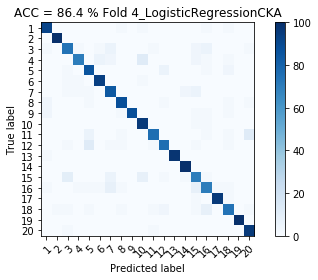

              precision    recall  f1-score   support

           1       0.87      0.92      0.89        50
           2       0.98      1.00      0.99        50
           3       0.77      0.74      0.76        50
           4       0.90      0.70      0.79        50
           5       0.77      0.86      0.81        50
           6       0.90      0.94      0.92        50
           7       0.76      0.84      0.80        50
           8       0.88      0.88      0.88        50
           9       1.00      0.88      0.94        50
          10       0.80      0.96      0.87        50
          11       0.90      0.76      0.83        50
          12       0.84      0.76      0.80        50
          13       1.00      0.98      0.99        50
          14       0.94      1.00      0.97        50
          15       0.69      0.70      0.69        50
          16       0.71      0.70      0.71        50
          17       0.98      0.96      0.97        50
          18       0.79    

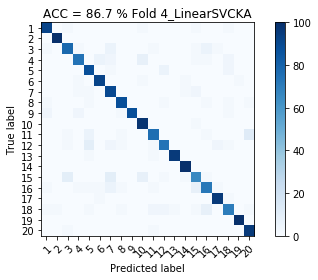

              precision    recall  f1-score   support

           1       0.88      0.92      0.90        50
           2       0.98      1.00      0.99        50
           3       0.81      0.78      0.80        50
           4       0.86      0.74      0.80        50
           5       0.77      0.88      0.82        50
           6       0.90      0.92      0.91        50
           7       0.74      0.90      0.81        50
           8       0.90      0.88      0.89        50
           9       1.00      0.88      0.94        50
          10       0.83      0.98      0.90        50
          11       0.84      0.76      0.80        50
          12       0.84      0.74      0.79        50
          13       0.98      0.96      0.97        50
          14       0.94      1.00      0.97        50
          15       0.75      0.66      0.70        50
          16       0.77      0.72      0.74        50
          17       0.92      0.96      0.94        50
          18       0.80    


4it [1:31:48, 1363.08s/it]

Iteration =  5/10
Linear Model
it:1/50---cost:-1.66e+00--- elapsed:39.37 [s]



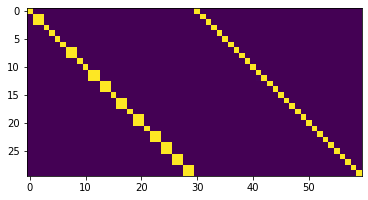

Logistic Regression Model
it:1/50---cost:-1.66e+00--- elapsed:32.87 [s]



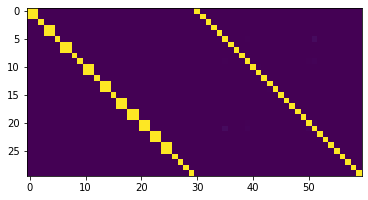

Linear SVM Model
it:1/50---cost:-1.66e+00--- elapsed:115.11 [s]



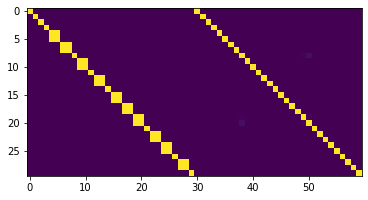

Guardando... LinearCKA_Fold5


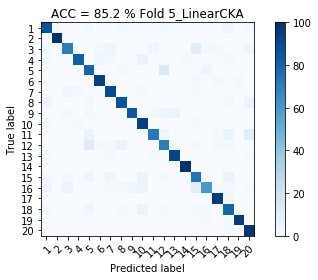

              precision    recall  f1-score   support

           1       0.81      0.86      0.83        50
           2       0.98      1.00      0.99        50
           3       0.83      0.70      0.76        50
           4       0.95      0.82      0.88        50
           5       0.71      0.80      0.75        50
           6       0.92      0.94      0.93        50
           7       0.85      0.90      0.87        50
           8       0.86      0.86      0.86        50
           9       0.95      0.84      0.89        50
          10       0.78      0.94      0.85        50
          11       0.90      0.72      0.80        50
          12       0.71      0.70      0.71        50
          13       0.92      0.92      0.92        50
          14       0.98      1.00      0.99        50
          15       0.71      0.74      0.73        50
          16       0.86      0.60      0.71        50
          17       0.91      0.96      0.93        50
          18       0.71    

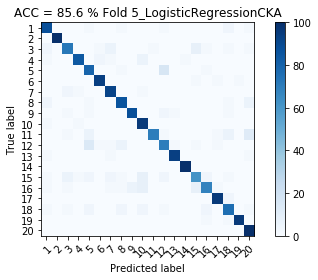

              precision    recall  f1-score   support

           1       0.81      0.88      0.85        50
           2       1.00      1.00      1.00        50
           3       0.80      0.72      0.76        50
           4       0.93      0.84      0.88        50
           5       0.70      0.80      0.75        50
           6       0.92      0.94      0.93        50
           7       0.84      0.92      0.88        50
           8       0.83      0.86      0.84        50
           9       0.94      0.88      0.91        50
          10       0.77      0.96      0.86        50
          11       0.97      0.70      0.81        50
          12       0.70      0.70      0.70        50
          13       0.96      0.94      0.95        50
          14       0.98      1.00      0.99        50
          15       0.76      0.62      0.68        50
          16       0.83      0.68      0.75        50
          17       0.92      0.96      0.94        50
          18       0.76    

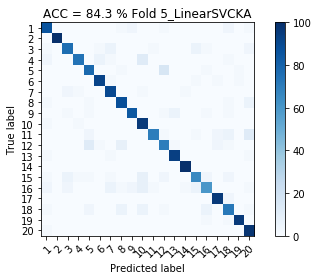

              precision    recall  f1-score   support

           1       0.80      0.86      0.83        50
           2       1.00      1.00      1.00        50
           3       0.83      0.76      0.79        50
           4       0.93      0.74      0.82        50
           5       0.75      0.78      0.76        50
           6       0.90      0.92      0.91        50
           7       0.82      0.90      0.86        50
           8       0.81      0.88      0.85        50
           9       0.91      0.84      0.87        50
          10       0.73      0.96      0.83        50
          11       0.95      0.70      0.80        50
          12       0.71      0.70      0.71        50
          13       0.92      0.94      0.93        50
          14       0.96      1.00      0.98        50
          15       0.80      0.66      0.73        50
          16       0.77      0.60      0.67        50
          17       0.91      0.96      0.93        50
          18       0.72    


5it [1:51:19, 1305.66s/it]

Iteration =  6/10
Linear Model
it:1/50---cost:-1.66e+00--- elapsed:68.17 [s]



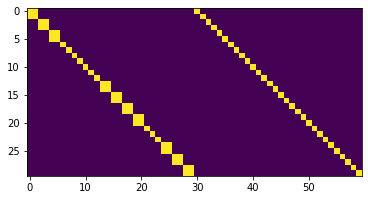

Logistic Regression Model
it:1/50---cost:-1.66e+00--- elapsed:38.65 [s]



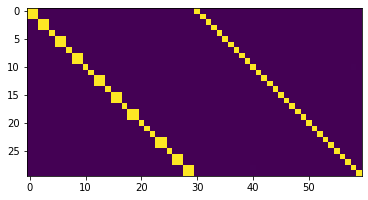

Linear SVM Model
it:1/50---cost:-1.66e+00--- elapsed:42.15 [s]



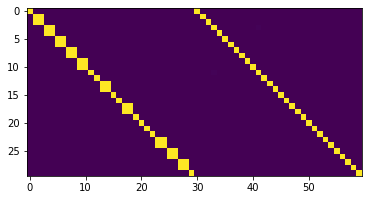

Guardando... LinearCKA_Fold6


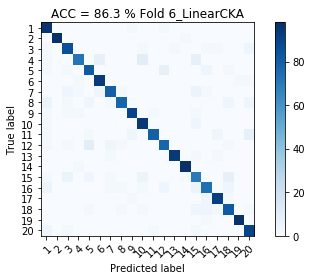

              precision    recall  f1-score   support

           1       0.75      0.96      0.84        50
           2       1.00      0.98      0.99        50
           3       0.81      0.86      0.83        50
           4       0.90      0.72      0.80        50
           5       0.79      0.82      0.80        50
           6       0.89      0.94      0.91        50
           7       0.87      0.80      0.83        50
           8       0.91      0.78      0.84        50
           9       0.92      0.90      0.91        50
          10       0.81      0.94      0.87        50
          11       0.95      0.80      0.87        50
          12       0.85      0.78      0.81        50
          13       0.98      0.94      0.96        50
          14       0.96      0.98      0.97        50
          15       0.67      0.70      0.69        50
          16       0.80      0.74      0.77        50
          17       0.90      0.92      0.91        50
          18       0.79    

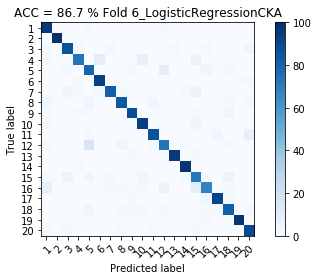

              precision    recall  f1-score   support

           1       0.79      0.96      0.86        50
           2       1.00      1.00      1.00        50
           3       0.86      0.86      0.86        50
           4       0.88      0.74      0.80        50
           5       0.70      0.80      0.75        50
           6       0.89      0.94      0.91        50
           7       0.93      0.82      0.87        50
           8       0.88      0.84      0.86        50
           9       0.92      0.88      0.90        50
          10       0.85      0.94      0.90        50
          11       0.91      0.86      0.89        50
          12       0.79      0.74      0.76        50
          13       0.98      0.96      0.97        50
          14       0.96      0.98      0.97        50
          15       0.69      0.72      0.71        50
          16       0.81      0.68      0.74        50
          17       0.94      0.92      0.93        50
          18       0.80    

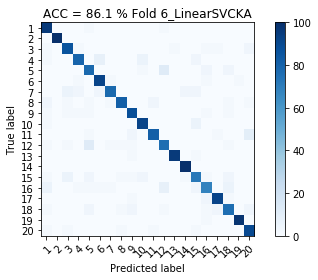

              precision    recall  f1-score   support

           1       0.79      0.96      0.86        50
           2       1.00      1.00      1.00        50
           3       0.81      0.86      0.83        50
           4       0.87      0.80      0.83        50
           5       0.72      0.78      0.75        50
           6       0.87      0.92      0.89        50
           7       0.91      0.78      0.84        50
           8       0.91      0.82      0.86        50
           9       0.85      0.88      0.86        50
          10       0.88      0.92      0.90        50
          11       0.93      0.82      0.87        50
          12       0.76      0.76      0.76        50
          13       0.98      0.96      0.97        50
          14       0.94      1.00      0.97        50
          15       0.77      0.72      0.74        50
          16       0.77      0.68      0.72        50
          17       0.92      0.92      0.92        50
          18       0.78    


6it [2:08:40, 1226.18s/it]

Iteration =  7/10
Linear Model
it:1/50---cost:-1.66e+00--- elapsed:34.92 [s]



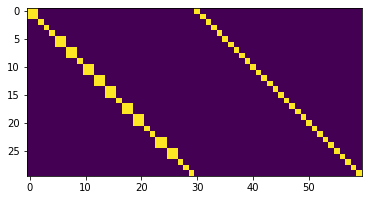

Logistic Regression Model
it:1/50---cost:-1.66e+00--- elapsed:21.33 [s]



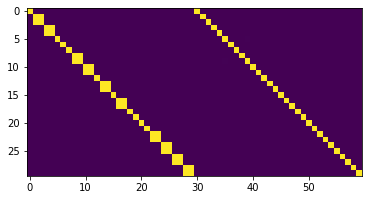

Linear SVM Model
it:1/50---cost:-1.66e+00--- elapsed:54.90 [s]



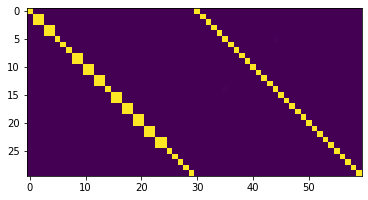

Guardando... LinearCKA_Fold7


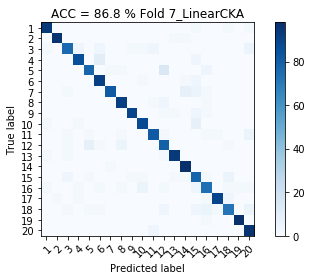

              precision    recall  f1-score   support

           1       0.92      0.94      0.93        50
           2       0.98      0.96      0.97        50
           3       0.84      0.76      0.80        50
           4       0.90      0.86      0.88        50
           5       0.85      0.78      0.81        50
           6       0.82      0.92      0.87        50
           7       0.95      0.82      0.88        50
           8       0.88      0.92      0.90        50
           9       0.96      0.90      0.93        50
          10       0.88      0.88      0.88        50
          11       0.89      0.82      0.85        50
          12       0.73      0.80      0.76        50
          13       0.94      0.94      0.94        50
          14       0.88      0.98      0.92        50
          15       0.68      0.78      0.73        50
          16       0.76      0.74      0.75        50
          17       0.96      0.90      0.93        50
          18       0.82    

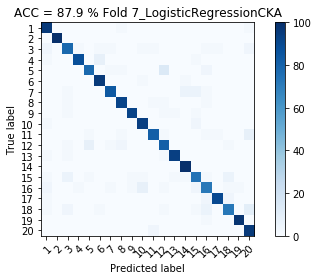

              precision    recall  f1-score   support

           1       0.83      0.96      0.89        50
           2       1.00      1.00      1.00        50
           3       0.80      0.78      0.79        50
           4       0.96      0.88      0.92        50
           5       0.87      0.78      0.82        50
           6       0.89      0.96      0.92        50
           7       0.91      0.84      0.87        50
           8       0.90      0.92      0.91        50
           9       0.96      0.92      0.94        50
          10       0.87      0.94      0.90        50
          11       0.91      0.82      0.86        50
          12       0.76      0.82      0.79        50
          13       0.96      0.94      0.95        50
          14       0.91      1.00      0.95        50
          15       0.79      0.74      0.76        50
          16       0.73      0.72      0.73        50
          17       0.96      0.90      0.93        50
          18       0.84    

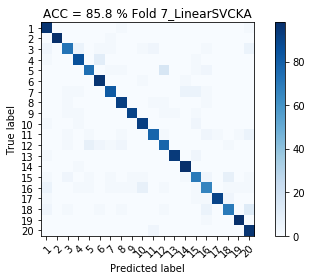

              precision    recall  f1-score   support

           1       0.80      0.96      0.87        50
           2       1.00      0.98      0.99        50
           3       0.82      0.72      0.77        50
           4       0.84      0.86      0.85        50
           5       0.84      0.74      0.79        50
           6       0.84      0.96      0.90        50
           7       0.87      0.82      0.85        50
           8       0.87      0.92      0.89        50
           9       0.96      0.90      0.93        50
          10       0.87      0.92      0.89        50
          11       0.89      0.78      0.83        50
          12       0.75      0.78      0.76        50
          13       0.98      0.94      0.96        50
          14       0.91      0.98      0.94        50
          15       0.74      0.70      0.72        50
          16       0.70      0.66      0.68        50
          17       0.98      0.90      0.94        50
          18       0.81    


7it [2:24:46, 1148.12s/it]

Iteration =  8/10
Linear Model
it:1/50---cost:-1.66e+00--- elapsed:29.39 [s]



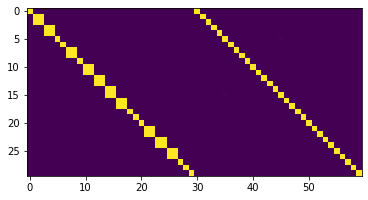

Logistic Regression Model
it:1/50---cost:-1.66e+00--- elapsed:36.89 [s]



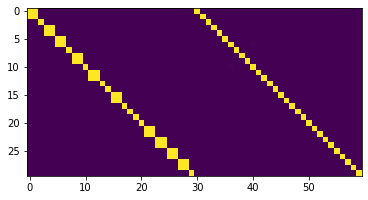

Linear SVM Model
it:1/50---cost:-1.67e+00--- elapsed:124.52 [s]



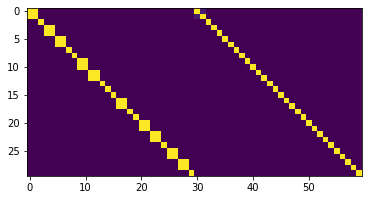

Guardando... LinearCKA_Fold8


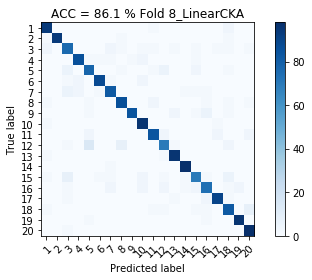

              precision    recall  f1-score   support

           1       0.85      0.94      0.90        50
           2       1.00      0.94      0.97        50
           3       0.72      0.76      0.74        50
           4       0.91      0.86      0.89        50
           5       0.75      0.78      0.76        50
           6       0.94      0.88      0.91        50
           7       0.84      0.82      0.83        50
           8       0.86      0.86      0.86        50
           9       0.98      0.84      0.90        50
          10       0.84      0.96      0.90        50
          11       0.88      0.84      0.86        50
          12       0.78      0.70      0.74        50
          13       0.91      0.96      0.93        50
          14       0.94      0.98      0.96        50
          15       0.80      0.70      0.74        50
          16       0.79      0.74      0.76        50
          17       0.92      0.90      0.91        50
          18       0.75    

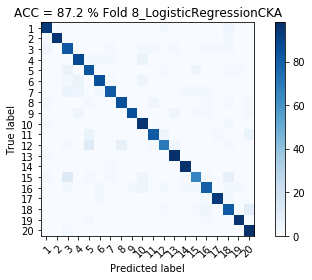

              precision    recall  f1-score   support

           1       0.87      0.94      0.90        50
           2       1.00      0.96      0.98        50
           3       0.72      0.82      0.77        50
           4       0.86      0.88      0.87        50
           5       0.76      0.84      0.80        50
           6       0.91      0.86      0.89        50
           7       0.89      0.82      0.85        50
           8       0.91      0.86      0.89        50
           9       0.98      0.86      0.91        50
          10       0.83      0.96      0.89        50
          11       0.91      0.82      0.86        50
          12       0.85      0.70      0.77        50
          13       0.91      0.98      0.94        50
          14       0.94      0.98      0.96        50
          15       0.85      0.66      0.74        50
          16       0.82      0.80      0.81        50
          17       0.96      0.94      0.95        50
          18       0.75    

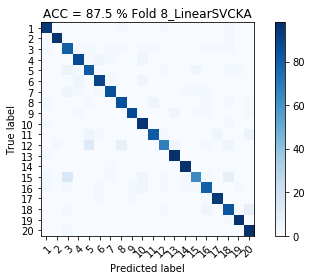

              precision    recall  f1-score   support

           1       0.87      0.94      0.90        50
           2       0.98      0.96      0.97        50
           3       0.73      0.80      0.76        50
           4       0.88      0.88      0.88        50
           5       0.79      0.82      0.80        50
           6       0.88      0.90      0.89        50
           7       0.90      0.86      0.88        50
           8       0.88      0.86      0.87        50
           9       0.96      0.88      0.92        50
          10       0.84      0.96      0.90        50
          11       0.93      0.82      0.87        50
          12       0.85      0.68      0.76        50
          13       0.92      0.98      0.95        50
          14       0.94      0.98      0.96        50
          15       0.86      0.64      0.74        50
          16       0.82      0.80      0.81        50
          17       0.94      0.94      0.94        50
          18       0.76    


8it [2:44:38, 1161.18s/it]

Iteration =  9/10
Linear Model
it:1/50---cost:-1.66e+00--- elapsed:28.42 [s]



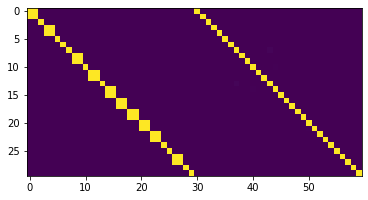

Logistic Regression Model
it:1/50---cost:-1.66e+00--- elapsed:114.59 [s]



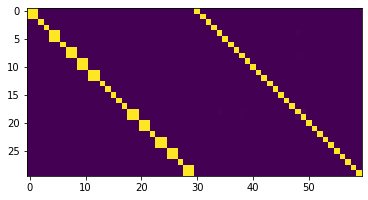

Linear SVM Model
it:1/50---cost:-1.66e+00--- elapsed:109.52 [s]



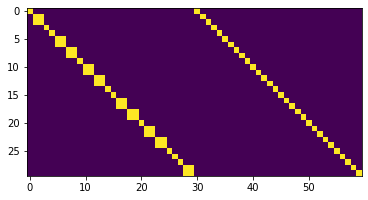

Guardando... LinearCKA_Fold9


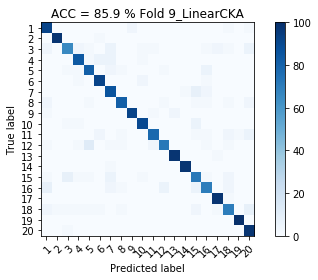

              precision    recall  f1-score   support

           1       0.78      0.92      0.84        50
           2       0.98      0.98      0.98        50
           3       0.80      0.66      0.73        50
           4       0.84      0.84      0.84        50
           5       0.79      0.82      0.80        50
           6       0.87      0.92      0.89        50
           7       0.74      0.86      0.80        50
           8       0.89      0.82      0.85        50
           9       0.96      0.92      0.94        50
          10       0.90      0.90      0.90        50
          11       0.91      0.78      0.84        50
          12       0.88      0.72      0.79        50
          13       0.96      0.98      0.97        50
          14       0.98      0.98      0.98        50
          15       0.72      0.72      0.72        50
          16       0.76      0.70      0.73        50
          17       0.92      0.98      0.95        50
          18       0.76    

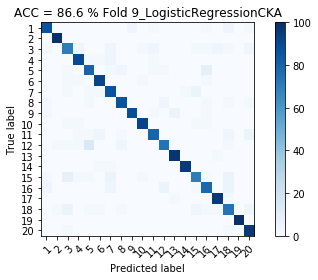

              precision    recall  f1-score   support

           1       0.88      0.86      0.87        50
           2       0.96      1.00      0.98        50
           3       0.73      0.70      0.71        50
           4       0.87      0.90      0.88        50
           5       0.75      0.80      0.78        50
           6       0.88      0.92      0.90        50
           7       0.80      0.86      0.83        50
           8       0.88      0.86      0.87        50
           9       0.96      0.88      0.92        50
          10       0.94      0.92      0.93        50
          11       0.87      0.80      0.83        50
          12       0.86      0.74      0.80        50
          13       0.92      0.98      0.95        50
          14       0.98      0.96      0.97        50
          15       0.81      0.70      0.75        50
          16       0.76      0.78      0.77        50
          17       0.92      0.96      0.94        50
          18       0.71    

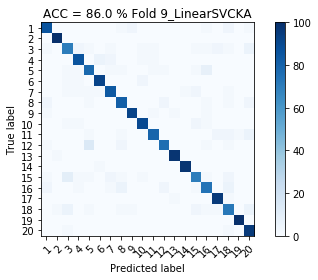

              precision    recall  f1-score   support

           1       0.84      0.86      0.85        50
           2       0.96      1.00      0.98        50
           3       0.73      0.70      0.71        50
           4       0.84      0.86      0.85        50
           5       0.75      0.78      0.76        50
           6       0.90      0.92      0.91        50
           7       0.86      0.84      0.85        50
           8       0.80      0.82      0.81        50
           9       0.94      0.92      0.93        50
          10       0.90      0.90      0.90        50
          11       0.91      0.80      0.85        50
          12       0.88      0.76      0.82        50
          13       0.96      0.98      0.97        50
          14       0.98      0.98      0.98        50
          15       0.80      0.70      0.74        50
          16       0.76      0.74      0.75        50
          17       0.91      0.96      0.93        50
          18       0.71    


9it [3:06:12, 1201.10s/it]

Iteration =  10/10
Linear Model
it:1/50---cost:-1.66e+00--- elapsed:27.11 [s]



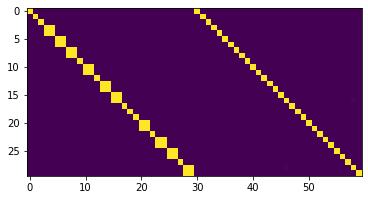

Logistic Regression Model
it:1/50---cost:-1.66e+00--- elapsed:29.55 [s]



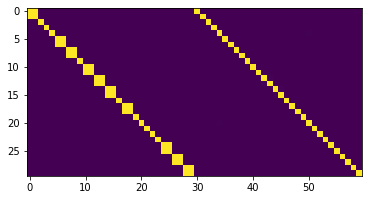

Linear SVM Model
it:1/50---cost:-1.66e+00--- elapsed:26.14 [s]



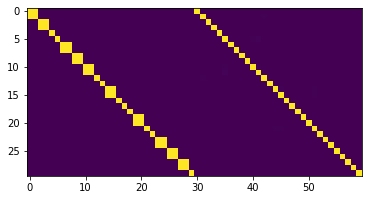

Guardando... LinearCKA_Fold10


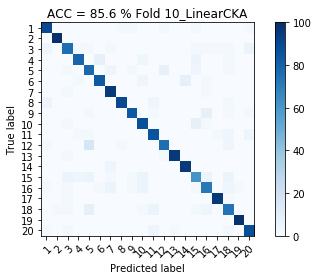

              precision    recall  f1-score   support

           1       0.87      0.90      0.88        50
           2       0.98      1.00      0.99        50
           3       0.78      0.76      0.77        50
           4       0.89      0.80      0.84        50
           5       0.68      0.78      0.73        50
           6       0.89      0.84      0.87        50
           7       0.84      0.96      0.90        50
           8       0.96      0.90      0.93        50
           9       0.91      0.84      0.87        50
          10       0.80      0.88      0.84        50
          11       0.84      0.86      0.85        50
          12       0.86      0.76      0.81        50
          13       0.98      0.96      0.97        50
          14       0.92      0.96      0.94        50
          15       0.70      0.62      0.66        50
          16       0.73      0.72      0.73        50
          17       0.96      0.96      0.96        50
          18       0.70    

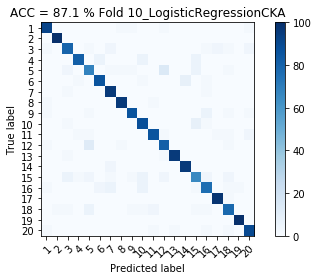

              precision    recall  f1-score   support

           1       0.88      0.92      0.90        50
           2       0.98      1.00      0.99        50
           3       0.82      0.80      0.81        50
           4       0.93      0.82      0.87        50
           5       0.71      0.68      0.69        50
           6       0.90      0.86      0.88        50
           7       0.84      0.96      0.90        50
           8       0.94      0.96      0.95        50
           9       0.91      0.86      0.89        50
          10       0.80      0.88      0.84        50
          11       0.91      0.86      0.89        50
          12       0.77      0.82      0.80        50
          13       0.98      0.96      0.97        50
          14       0.92      0.96      0.94        50
          15       0.73      0.66      0.69        50
          16       0.78      0.76      0.77        50
          17       0.94      0.98      0.96        50
          18       0.80    

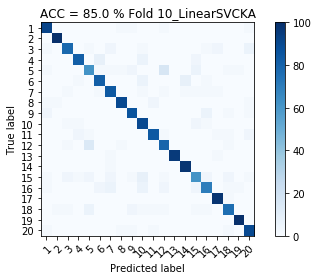

              precision    recall  f1-score   support

           1       0.85      0.92      0.88        50
           2       0.96      1.00      0.98        50
           3       0.87      0.78      0.82        50
           4       0.89      0.82      0.85        50
           5       0.69      0.62      0.65        50
           6       0.84      0.82      0.83        50
           7       0.81      0.84      0.82        50
           8       0.92      0.90      0.91        50
           9       0.86      0.86      0.86        50
          10       0.74      0.90      0.81        50
          11       0.91      0.84      0.87        50
          12       0.73      0.80      0.76        50
          13       1.00      0.96      0.98        50
          14       0.91      0.98      0.94        50
          15       0.74      0.62      0.67        50
          16       0.78      0.70      0.74        50
          17       0.91      0.98      0.94        50
          18       0.81    


10it [3:18:55, 1193.53s/it]


In [ ]:
# Traininig/Testing loop
fold = 0

for train_index, test_index in tqdm(sss.split(X,y)):
    # Training/testing index storage
    train_idx += [train_index]
    test_idx  += [test_index]
    
    # Number of partitions flag
    fold = fold + 1
    print("Iteration = ", str(fold) +'/'+ str(n_partitions))
    
    # Iteration file name 
    filename = img_path + "/Fold" + str(fold)

    # Train/Test partition and matrix storing to apply CKA over them for 
    # visualization
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    X_train_cka = X_train
    X_test_cka  = X_test
    y_train_cka = y_train
    y_test_cka  = y_test

    # ---------------------------------------------------------------------------------------------------------------------------
    # Training
    
    # Linear
    print('Linear Model')
    # Using GridSearchCV 
    # hs_Lineal = GridSearchCV(Pipeline(steps[0]), parameters[0], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_Lineal = RandomizedSearchCV(Pipeline(steps[0]), param_distributions=parameters[0],n_iter=10, cv=5, iid=False, n_jobs=10)
    hs_Lineal.fit(X_train,y_train)
    # Projection matrix from CKA
    W_cka_L += [hs_Lineal.best_estimator_.named_steps['Projection'].Wcka]


    # Logistic Regression
    print('Logistic Regression Model')
    # Usaing GridSearchCV 
    # hs_LogR = GridSearchCV(Pipeline(steps[1]), parameters[1], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_LogR = RandomizedSearchCV(Pipeline(steps[1]), param_distributions=parameters[1],n_iter=10, cv=5, iid=False,n_jobs=10)
    hs_LogR.fit(X_train,y_train)
    # Projection matrix from CKA
    W_cka_LogR += [hs_LogR.best_estimator_.named_steps['Projection'].Wcka]
  

    # Linear SVM
    print('Linear SVM Model')
    # Using GridSearchCV 
    #hs_lSVM = GridSearchCV(Pipeline(steps[2]), parameters[2], n_jobs = 6, cv = 5, scoring = 'balanced_accuracy', verbose = 50)
    # Using RandomizedSearchCV
    hs_lSVM = RandomizedSearchCV(Pipeline(steps[2]), param_distributions=parameters[2],n_iter=10, cv=5, iid=False, n_jobs=10)  
    hs_lSVM.fit(X_train,y_train)
    # Projection matrix from CKA
    W_cka_lSVM += [hs_lSVM.best_estimator_.named_steps['Projection'].Wcka]

    # ---------------------------------------------------------------------------------------------------------------------------
    # Validation
    
    # Linear
    y_pred_L           = hs_Lineal.best_estimator_.predict(X_test)
    accuracy_L[fold-1] = accuracy_score(y_test,y_pred_L)
    cm_temp            = confusion_matrix(y_test,y_pred_L)
    cm_L[fold-1,:,:]   = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_L, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_L[fold-1],fold) + '_'+ label_models[0])
    plt.autoscale()
    save_fig(img_path,label_models[0]+'_Fold'+str(fold))                      
    plt.show()
    cr_L += [classification_report(y_test,y_pred_L)]
    print(cr_L[-1])
    # Best model storage
    # best_mod_L += [hs_Lineal.best_estimator_, accuracy_L,cm_L,cr_L, sel_fts_L]
    # best_mod_L += [hs_Lineal.best_estimator_]
    best_pms_L += [hs_Lineal.best_params_]
    joblib.dump(best_pms_L, filename + "LinealCKA" + ".pkl")


    # Logistic Regression
    y_pred_LogR          = hs_LogR.best_estimator_.predict(X_test)
    accuracy_LogR[fold-1]= accuracy_score(y_test,y_pred_LogR)
    cm_temp              = confusion_matrix(y_test,y_pred_LogR)
    cm_LogR[fold-1,:,:]  = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_LogR, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_LogR[fold-1],fold) + '_'+ label_models[1])
    plt.autoscale()
    save_fig(img_path,label_models[1]+'_Fold'+str(fold))                      
    plt.show()
    cr_LogR += [classification_report(y_test,y_pred_LogR)]
    print(cr_LogR[-1])
    # Best model storage
    # best_mod_LogR += [hs_LogR.best_estimator_, accuracy_LogR,cm_LogR,cr_LogR, sel_fts_LogR]
    # best_mod_LogR += [hs_LogR.best_estimator_]
    best_pms_LogR += [hs_LogR.best_params_]
    joblib.dump(best_pms_LogR, filename + "LogRCKA" + ".pkl")


    # Linear SVM
    y_pred_lSVM          = hs_lSVM.best_estimator_.predict(X_test)
    accuracy_lSVM[fold-1]= accuracy_score(y_test,y_pred_lSVM)
    cm_temp              = confusion_matrix(y_test,y_pred_lSVM)
    cm_LogR[fold-1,:,:]  = 100*cm_temp.astype('float') / cm_temp.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(y_test, y_pred_lSVM, classes=np.unique(y),normalize=True,title='ACC = %.1f %% Fold %d' % (100*accuracy_lSVM[fold-1],fold) + '_'+ label_models[2])
    plt.autoscale()
    save_fig(img_path,label_models[2]+'_Fold'+str(fold))                      
    plt.show()
    cr_lSVM += [classification_report(y_test,y_pred_lSVM)]
    print(cr_lSVM[-1])
    # Best model storage
    # best_mod_lSVM += [hs_lSVM.best_estimator_, accuracy_lSVM,cm_lSVM,cr_lSVM, sel_fts_lSVM]
    # best_mod_lSVM += [hs_lSVM.best_estimator_]
    best_pms_lSVM += [hs_lSVM.best_params_]
    joblib.dump(best_pms_lSVM, filename + "lSVMCKA" + ".pkl")
    
    # Results dictionary creation
    L_dict = {'accuracy_L': accuracy_L,
              'cm_L': cm_L,
              'cr_L': cr_L,
              'W_cka_L': W_cka_L,
              'X_train_cka': X_train_cka,
              'X_test_cka': X_test_cka,
              'y_train_cka':y_train_cka,
              'y_test_cka':y_test_cka}

    LogR_dict = {'accuracy_LogR': accuracy_LogR,
                'cm_LogR': cm_LogR,
                'cr_LogR': cr_LogR,
                'W_cka_LogR': W_cka_LogR,
                'X_train_cka': X_train_cka,
                'X_test_cka': X_test_cka,
                'y_train_cka':y_train_cka,
                'y_test_cka':y_test_cka}

    lSVM_dict = {'accuracy_lSVM': accuracy_lSVM,
                'cm_lSVM': cm_lSVM,
                'cr_lSVM': cr_lSVM,
                'W_cka_lSVM': W_cka_lSVM,
                'X_train_cka': X_train_cka,
                'X_test_cka': X_test_cka,
                'y_train_cka':y_train_cka,
                'y_test_cka':y_test_cka}

    Results = [L_dict, LogR_dict, lSVM_dict]
    
    joblib.dump(Results, rslt_dir + ".pkl")

Average result printing

In [ ]:
print('Linear Classifier')
print(str(np.mean(np.array(Results[0]['accuracy_L']))*100) + '+/-' + str(np.std(np.array(Results[0]['accuracy_L']))*100))

print('Logistic Regression Classifier')
print(str(np.mean(np.array(Results[1]['accuracy_LogR']))*100) + '+/-' + str(np.std(np.array(Results[1]['accuracy_LogR']))*100))

print('Linear SVM Classifier')
print(str(np.mean(np.array(Results[2]['accuracy_lSVM']))*100) + '+/-' + str(np.std(np.array(Results[2]['accuracy_lSVM']))*100))

Linear Classifier
85.77999999999999+/-0.7025667228100125
Logistic Regression Classifier
86.72000000000001+/-0.6477653896280665
Linear SVM Classifier
85.8+/-0.998999499499375


Projection matrix plotting

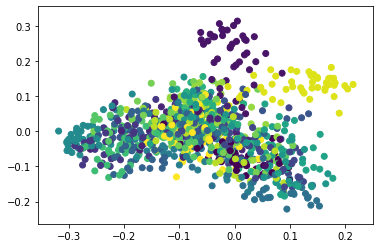

In [ ]:
W    = Results[1]['W_cka_LogR'][0]
Xp   = X_train_cka.dot(W)
# Plotting the projection matrix
plt.scatter(Xp[:,1],Xp[:,2],c = y_train_cka)